In [1]:
from newsapi import NewsApiClient
import datetime as dt
import pandas as pd
from pandas import DataFrame
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
from collections import Counter
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import string
import matplotlib.pyplot as plt

#newsAPI
newsapi = NewsApiClient(api_key = '127ac9edf9da4a56bbce2c6ff98978c4')
pd.options.display.max_colwidth = 8000

#twitter API
consumerKey = "jfAlL4ZYSvAcLZjIghNjkPVef"
consumerSecret = "E2Wd7Fc9kQhMC4x9bTbyo8IzyDOjH7gkgXc5ZzHKBv1na0JdCB"
accessToken = "1168827517387468800-sqEsr4vVHF4ZQ0BnfyFCqTaK4H17gr"
accessTokenSecret = "FTFWWelxrVTBlwfWsHSIMe4jKI5ikzkhdZ5QcsKuCNxUS"

authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)

#calling api
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [2]:
def get_sources():
    sources = {'source':  ['associated-press', 'australian-financial-review', 'bbc-news' , 'bloomberg', 'breitbart-news', 'business-insider',
                       'cnn', 'cbc-news', 'financial-post', 'fortune', 'google-news-uk', 'reuters', 'the-huffington-post', 'the-wall-street-journal', 'the-washington-post', 
                        'time', 'usa-today' ] , 'source name':  ['Associated Press', 'Australian Financial Review', 'BBC News' , 'Bloomberg', 'Breitbart News', 'Business Insider', 
                       'CNN', 'CBC News ', 'Financial Post', 'Fortune', 'Google News UK', 'Reuters', 'The Huffington Post', 'The Wall Street Journal', 'The Washington Post', 
                        'Time', 'USA Today' ]}
    df = pd.DataFrame(sources, columns = ['source', 'source name' ])
    
    return df


def preprocessing (text):
    stopwords = nltk.corpus.stopwords.words('english')
    another = "idk,amp,aboard,about,above,gif,idk,absent,ive,weve,hes,shes,accordance,according,account,across,addition,after,against,ahead,along,alongside,also,although,amid,amidst,among,amongst,and,anent,anti,apart,around,as,aside,astride,at,athwart,atop,barring,because,before,behalf,behind,behither,below,beneath,beside,besides,between,betwixt,beyond,both,but,by,case,circa,close,concerning,considering,cum,despite,down,due,during,either,ere,even,except,excluding,failing,far,following,for,fornenst,fornent,from,front,given,if,in,including,inside,instead,into,lest,lieu,like,means,mid,minus,near,neither,next,nor,notwithstanding,of,off,on,once,only,onto,opposite,or,out,outside,outwith,over,owing,pace,past,per,place,plus,point,prior,pro,pursuant,qua,re,regard,regarding,regardless,regards,respect,round,sans,save,since,so,soon,spite,subsequent,than,thanks,that,though,through,throughout,till,times,to,top,toward,towards,under,underneath,unless,unlike,until,unto,up,upon,versus,via,vice,vis-à-vis,well,when,whenever,where,wherever,whether,while,with,within,without,worth,yet,a,able,about,across,after,all,almost,also,am,among,an,and,any,are,aren't,arent,as,at,be,because,been,but,by,can,cannot,could,dear,did,didn't,didnt,do,don't,dont,does,doesn't,doesnt,either,else,ever,every,for,from,get,got,had,has,have,he,her,hers,him,his,how,however,i,if,in,into,is,it,its,just,least,let,like,likely,may,me,might,most,must,my,neither,no,nor,not,of,off,often,on,only,or,other,our,own,rather,said,say,says,she,should,shouldn't,shouldnt,since,so,some,than,that,the,their,them,then,there,these,they,this,tis,to,too,twas,us,wants,was,wasn't,wasnt,we,were,weren't,werent,what,when,where,which,while,who,whom,why,will,with,would,yet,you,your,a's,able,about,above,according,accordingly,across,actually,after,afterwards,again,against,ain't,all,allow,allows,almost,alone,along,already,also,although,always,am,among,amongst,an,and,another,any,anybody,anyhow,anyone,anything,anyway,anyways,anywhere,apart,appear,appreciate,appropriate,are,aren't,around,as,aside,ask,asking,associated,at,available,away,awfully,be,became,because,become,becomes,becoming,been,before,beforehand,behind,being,believe,below,beside,besides,best,better,between,beyond,both,brief,but,by,c'mon,c's,came,can,can't,cannot,cant,cause,causes,certain,certainly,changes,clearly,co,com,come,comes,concerning,consequently,consider,considering,contain,containing,contains,corresponding,could,couldn't,course,currently,definitely,described,despite,did,didn't,didnt,different,do,does,doesnt,dontdoesn't,doing,don't,done,down,downwards,during,each,edu,eg,eight,either,else,elsewhere,enough,entirely,especially,et,etc,even,ever,every,everybody,everyone,everything,everywhere,ex,exactly,example,except,far,few,fifth,first,five,followed,following,follows,for,former,formerly,forth,four,from,further,furthermore,get,gets,getting,given,gives,go,goes,going,gone,got,gotten,greetings,had,hadn't,happens,hardly,has,hasn't,have,haven't,having,he,he's,hello,help,hence,her,here,here's,hereafter,hereby,herein,hereupon,hers,herself,hi,him,himself,his,hither,hopefully,how,howbeit,however,i'd,i'll,i'm,i've,ie,if,ignored,immediate,in,inasmuch,inc,indeed,indicate,indicated,indicates,inner,insofar,instead,into,inward,is,isnt,itd,itllitsisn't,it,it'd,it'll,it's,its,itself,just,keep,keeps,kept,know,knows,known,last,lately,later,latter,latterly,least,less,lest,let,let's,like,liked,likely,little,look,looking,looks,ltd,mainly,many,may,maybe,me,mean,meanwhile,merely,might,more,moreover,most,mostly,much,must,my,myself,name,namely,nd,near,nearly,need,needs,neither,never,nevertheless,new,next,nine,no,nobody,non,none,noone,nor,normally,not,nothing,novel,now,nowhere,obviously,of,off,often,oh,ok,okay,old,on,once,one,ones,only,onto,or,other,others,otherwise,ought,our,ours,ourselves,out,outside,over,overall,own,particular,particularly,per,perhaps,placed,please,plus,possible,presumably,probably,provides,que,quite,qv,rather,rd,re,really,reasonably,regarding,regardless,regards,relatively,respectively,right,said,same,saw,say,saying,says,secondly,see,seeing,seem,seemed,seeming,seems,seen,self,selves,sent,seriously,seven,several,shall,she,should,shouldn't,since,six,so,some,somebody,somehow,someone,something,sometime,sometimes,somewhat,somewhere,soon,sorry,specified,specify,specifying,still,sub,such,sup,sure,t's,take,taken,tell,tends,th,than,thank,thanks,thanx,that,that's,thats,the,their,theirs,them,themselves,then,thence,there,theres,there's,thereafter,thereby,therefore,therein,theres,thereupon,these,they,theyd,theyll,theyre,theyve,they'd,they'll,they're,they've,think,third,this,thorough,thoroughly,those,though,three,through,throughout,thru,thus,to,together,too,took,toward,towards,tried,tries,truly,try,trying,twice,two,un,under,unfortunately,unless,unlikely,until,unto,up,upon,us,use,used,useful,uses,using,usually,value,various,very,via,viz,vs,want,wants,was,wasnt,wed,well,wasn't,way,we,we'd,we'll,we're,we've,welcome,well,went,were,werent,whats,weren't,what,what's,whatever,when,whence,whenever,where,where's,whereafter,whereas,whereby,wherein,whereupon,wherever,whether,which,while,whither,who,who's,whoever,whole,whom,whose,why,will,willing,wish,with,within,without,won't,wonder,would,would,wouldn't,yes,yet,you,you'd,you'll,you're,you've,your,yours,yourself,yourselves,zero,reuters,ap,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,tech,news,index,mon,tue,wed,thu,fri,sat,'s,a,a's,able,about,above,according,accordingly,across,actually,after,afterwards,again,against,ain't,all,allow,allows,almost,alone,along,already,also,although,always,am,amid,among,amongst,an,and,another,any,anybody,anyhow,anyone,anything,anyway,anyways,anywhere,apart,appear,appreciate,appropriate,are,aren't,around,as,aside,ask,asking,associated,at,available,away,awfully,b,be,became,because,become,becomes,becoming,been,before,beforehand,behind,being,believe,below,beside,besides,best,better,between,beyond,both,brief,but,by,c,c'mon,c's,came,can,can't,cannot,cant,cause,causes,certain,certainly,changes,clearly,co,com,come,comes,concerning,consequently,consider,considering,contain,containing,contains,corresponding,could,couldn't,course,currently,d,definitely,described,despite,did,didn't,different,do,does,doesn't,doing,don't,done,down,downwards,during,e,each,edu,eg,e.g.,eight,either,else,elsewhere,enough,entirely,especially,et,etc,etc.,even,ever,every,everybody,everyone,everything,everywhere,ex,exactly,example,except,f,far,few,fifth,five,followed,following,follows,for,former,formerly,forth,four,from,further,furthermore,g,get,gets,getting,given,gives,go,goes,going,gone,got,gotten,greetings,h,had,hadn't,happens,hardly,has,hasn't,have,haven't,having,he,he's,hello,help,hence,her,here,here's,hereafter,hereby,herein,hereupon,hers,herself,hi,him,himself,his,hither,hopefully,how,howbeit,however,i,i'd,i'll,i'm,i've,ie,i.e.,if,ignored,immediate,in,inasmuch,inc,indeed,indicate,indicated,indicates,inner,insofar,instead,into,inward,is,isn't,it,it'd,it'll,it's,its,itself,j,just,k,keep,keeps,kept,know,knows,known,l,lately,later,latter,latterly,least,less,lest,let,let's,like,liked,likely,little,look,looking,looks,ltd,m,mainly,many,may,maybe,me,mean,meanwhile,merely,might,more,moreover,most,mostly,mr.,ms.,much,must,my,myself,n,namely,nd,near,nearly,necessary,need,needs,neither,never,nevertheless,new,next,nine,no,nobody,non,none,noone,nor,normally,not,nothing,novel,now,nowhere,o,obviously,of,off,often,oh,ok,okay,old,on,once,one,ones,only,onto,or,other,others,otherwise,ought,our,ours,ourselves,out,outside,over,overall,own,p,particular,particularly,per,perhaps,placed,please,plus,possible,presumably,probably,provides,q,que,quite,qv,r,rather,rd,re,really,reasonably,regarding,regardless,regards,relatively,respectively,right,s,said,same,saw,say,saying,says,second,secondly,see,seeing,seem,seemed,seeming,seems,seen,self,selves,sensible,sent,serious,seriously,seven,several,shall,she,should,shouldn't,since,six,so,some,somebody,somehow,someone,something,sometime,sometimes,somewhat,somewhere,soon,sorry,specified,specify,specifying,still,sub,such,sup,sure,t,t's,take,taken,tell,tends,th,than,thank,thanks,thanx,that,that's,thats,the,their,theirs,them,themselves,then,thence,there,there's,thereafter,thereby,therefore,therein,theres,thereupon,these,they,they'd,they'll,they're,they've,think,third,this,thorough,thoroughly,those,though,three,through,throughout,thru,thus,to,together,too,took,toward,towards,tried,tries,truly,try,trying,twice,two,u,un,under,unfortunately,unless,unlikely,until,unto,up,upon,us,use,used,useful,uses,using,usually,uucp,v,value,various,very,via,viz,vs,w,want,wants,was,wasn't,way,we,we'd,we'll,we're,we've,welcome,well,went,were,weren't,what,what's,whatever,when,whence,whenever,where,where's,whereafter,whereas,whereby,wherein,whereupon,wherever,whether,which,while,whither,who,who's,whoever,whole,whom,whose,why,will,willing,wish,with,within,without,won't,wonder,would,would,wouldn't,x,y,yes,yet,you,you'd,you'll,you're,you've,your,yours,yourself,yourselves,z,zero,.com,.ly,.net,.org,aahh,aarrgghh,abt,ftl,ftw,fu,fuck,fucks,gtfo,gtg,haa,hah,hahah,haha,hahaha,hahahaha,hehe,heh,hehehe,hi,hihi,hihihi,http,https,huge,huh,huhu,huhuhu,idk,iirc,im,imho,imo,ini,irl,ish,isn,isnt,j/k,jk,jus,just,justwit,juz,kinda,kthx,kthxbai,kyou,laa,laaa,lah,lanuch,leavg,leh,lol,lols,ltd,mph,mrt,msg,msgs,muahahahahaha,nb,neways,ni,nice,pls,plz,plzz,psd,pte,pwm,pwned,qfmft,qft,tis,tm,tmr,tyty,tyvm,um,umm,viv,vn,vote,voted,w00t,wa,wadever,wah,wasn,wasnt,wassup,wat,watcha,wateva,watever,watnot,wats,wayy,wb,weren,werent,whaha,wham,whammy,whaow,whatcha,whatev,whateva,whatevar,whatever,whatnot,whats,whatsoever,whatz,whee,whenz,whey,whore,whores,whoring,win,wo,woah,woh,wooohooo,woot,wow,wrt,wtb,wtf,wth,wts,wtt,www,xs,ya,yaah,yah,yahh,yahoocurrency,yall,yar,yay,yea,yeah,yeahh,yeh,yhoo,ymmv,young,youre,yr,yum,yummy,yumyum,yw,zomg,zz,zzz,loz,lor,loh,tsk,meh,lmao,wanna,doesn,liao,didn,didnt,omg,ohh,ohgod,hoh,hoo,bye,byee,byeee,byeeee,lmaolmao,yeah,yeahh,yeahhh,yeahhhh,yeahhhhh,yup,yupp,hahahahahahaha,hahahahahah,hahhaha,wooohoooo,wahaha,haah,2moro,veh,noo,nooo,noooo,hahas,ooooo,ahahaha,ahahahahah,tomolow,.com,.ly,.net,.org,aahh,aarrgghh,abt,accent,accented,accents,acne,ads,afaik,aft,ago,ahead,ain,aint,aircon,alot,am,annoy,annoyed,annoys,anycase,anymore,app,apparently,apps,argh,ass,asses,awesome,babeh,bad,bai,based,bcos,bcoz,bday,bit,biz,blah,bleh,bless,blessed,blk,blogcatalog,bro,bros,btw,byee,com,congrats,contd,conv,cos,cost,costs,couldn,couldnt,cove,coves,coz,crap,cum,curnews,curr,cuz,dat,de,didn,didnt,diff,dis,doc,doesn,doesnt,don,dont,dr,dreamt,drs,due,dun,dunno,duper,eh,ehh,emo,emos,eng,esp,fadein,ffs,fml,frm,ftl,ftw,fu,fuck,fucks,fwah,g2g,gajshost,gd,geez,gg,gigs,gtfo,gtg,haa,haha,hahaha,hasn,hasnt,hav,haven,havent,hee,heh,hehe,hehehe,hello,hey,hi,hmm,ho,hohoho,http,https,huh,huhu,huhuhu,idk,iirc,im,imho,imo,info,ini,irl,ish,isn,isnt,issued,j/k,jk,jus,just,justwit,juz,kinda,kthx,kthxbai,kyou,laa,laaa,lah,lanuch,lawl,leavg,leh,lfg,lfm,ll,lmao,lmfao,lnks,lol,lols,lotsa,lotta,ltd,luv,ly,macdailynews,meh,mph,msg,msgs,muahahahahaha,nb,neato,ni,nite,nom,noscript,nvr,nw,ohayo,omfg,omfgwtf,omg,omgwtfbbq,omw,org,pf,pic,pls,plz,plzz,pm,pmsing,ppl,pre,pro,psd,pte,pwm,pwned,qfmft,qft,rawr,rawrr,rofl,roflmao,rss,rt,sec,secs,seem,seemed,seems,sgreinfo,shd,shit,shits,shitz,shld,shouldn,shouldnt,shudder,sq,sqft,sqm,srsly,stfu,stks,su,suck,sucked,sucks,suckz,sux,swf,tart,tat,tgif,thanky,thk,thks,tht,tired,tis,tm,tmr,tsk,ttyl,ty,tym,tyme,typed,tyty,tyvm,um,umm,va,valid,valids,var,vc,ve,viv,vn,w00t,wa,wadever,wah,wasn,wasnt,wassup,wat,watcha,wateva,watnot,wats,wayy,wb,web,website,websites,weren,werent,whaha,wham,whammy,whaow,whatcha,whatev,whateva,whatevar,whatever,whatnot,whats,whatsoever,whatz,whee,whenz,whey,whore,whores,whoring,wo,woah,woh,wooohooo,woot,wow,wrt,wtb,wtf,wth,wts,wtt,www,xs,ya,yaah,yah,yahh,yahoocurrency,yall,yar,yay,yea,yeah,yeahh,year,yearly,years,yeh,yhoo,ymmv,young,youre,yr,yum,yummy,yumyum,yw,zomg,zz,zzz,fucking,mrs,mr,eh,ehh,ehhh,lot,lots,http,html,com,ly,net,org,hahahahahahahahaha,hahahahaha,hahahahah,zzzzz,#teamfollowback,#teamfollow,#follow,#autofollow,#followgain,#followbackk,#teamautofollow,#followme,#ifollow,#followngain,#followback,#followfriday,#ifollowback,#200aday,#500aday,#1000aday,hahahahha,lolololol,lololol,lolol,lol,dude,hmmm,humm,tumblr,kkkk,fk,yayyyyyy,fffffffuuuuuuuuuuuu,zzzz,zzzzz,noooooooooo,noo,nooo,noooo,hahahhaha,woohoo,lalalalalalala,lala,lalala,lalalala,whahahaahahahahahah,.com,.ly,.net,.org,aahh,aarrgghh,abt,ftl,ftw,fu,fuck,fucks,gtfo,gtg,haa,hah,hahah,haha,hahaha,hahahaha,hehe,heh,hehehe,hi,hihi,hihihi,http,https,huge,huh,huhu,huhuhu,idk,iirc,im,imho,imo,ini,irl,ish,isn,isnt,j/k,jk,jus,just,justwit,juz,kinda,kthx,kthxbai,kyou,laa,laaa,lah,lanuch,leavg,leh,lol,lols,ltd,mph,mrt,msg,msgs,muahahahahaha,nb,neways,ni,nice,pls,plz,plzz,psd,pte,pwm,pwned,qfmft,qft,tis,tm,tmr,tyty,tyvm,um,umm,viv,vn,vote,voted,w00t,wa,wadever,wah,wasn,wasnt,wassup,wat,watcha,wateva,watever,watnot,wats,wayy,wb,weren,werent,whaha,wham,whammy,whaow,whatcha,whatev,whateva,whatevar,whatever,whatnot,whats,whatsoever,whatz,whee,whenz,whey,whore,whores,whoring,win,wo,woah,woh,wooohooo,woot,wow,wrt,wtb,wtf,wth,wts,wtt,www,xs,ya,yaah,yah,yahh,yahoocurrency,yall,yar,yay,yea,yeah,yeahh,yeh,yhoo,ymmv,young,youre,yr,yum,yummy,yumyum,yw,zomg,zz,zzz,loz,lor,loh,tsk,meh,lmao,wanna,doesn,liao,didn,didnt,omg,ohh,ohgod,hoh,hoo,bye,byee,byeee,byeeee,lmaolmao,yeah,yeahh,yeahhh,yeahhhh,yeahhhhh,yup,yupp,hahahahahahaha,hahahahahah,hahhaha,wooohoooo,wahaha,haah,2moro,veh,noo,nooo,noooo,hahas,ooooo,ahahaha,ahahahahah,tomolow,.com,.ly,.net,.org,aahh,aarrgghh,abt,accent,accented,accents,acne,ads,afaik,aft,ago,ahead,ain,aint,aircon,alot,am,annoy,annoyed,annoys,anycase,anymore,app,apparently,apps,argh,ass,asses,awesome,babeh,bad,bai,based,bcos,bcoz,bday,big,bigger,biggest,bit,biz,blah,bleh,bless,blessed,blk,blogcatalog,bored,boring,bright,bring,brings,bro,broke,broken,bros,brought,btw,bye,byebye,byee,cheap,clutter,cluttered,com,common,complete,completed,completes,completing,congrats,congratulation,congratulations,consecutive,consecutively,contd,continue,continues,conv,cos,cost,costs,couldn,couldnt,cove,coves,coz,crap,crappy,crazy,crowded,cum,curnews,curr,cute,cuties,cuz,daily,damn,dark,dat,days,de,dear,didn,didnt,diff,dis,distracted,distracts,doc,doesn,doesnt,don,dont,door,doors,double,doubled,doubles,dr,dreamt,drs,due,dun,dunno,duper,earlier,earliest,early,earn,earned,earns,easier,easy,eat,eaten,eats,eh,ehh,emo,emos,enable,enables,enabling,eng,enter,entered,enters,esp,everyday,everywhere,exclude,excluded,excludes,excuse,excused,excuses,explode,exploded,explodes,eye,eyes,fadein,fail,failed,fails,fake,fall,falls,false,famous,fast,faster,fastest,fat,featured,feel,feeling,feels,fell,felt,ffs,finally,find,finds,finish,finished,flat,flats,flight,flights,fml,follow,followed,follows,food,form,formed,forming,forms,found,free,fries,frm,ftl,ftw,fu,fuck,fucks,full,fully,fun,funny,furnish,furnished,future,fwah,g2g,gajshost,gave,gd,geez,gg,gigs,gimme,give,giveaway,giveaways,given,gives,gonna,good,goodbye,goodnight,got,gotta,grats,gratz,great,greats,gtfo,gtg,guess,guessing,haa,haha,hahaha,happen,happened,happens,hard,harder,hardest,hasn,hasnt,hate,hated,hates,hav,haven,havent,hdb,hear,heard,hears,heart,hee,heh,hehe,hehehe,hello,hey,hi,highest,hmm,ho,hohoho,hopefully,hoping,host,hosted,hosts,hot,hour,hours,http,https,huge,huh,huhu,huhuhu,hurt,hurts,idiot,idiots,idk,iirc,im,imho,imo,important,indicate,indicated,indicates,indicating,info,ini,install,interact,interacted,interacting,interacts,interested,interesting,involve,involved,involves,irl,ish,isn,isnt,issued,j/k,jk,jus,just,justwit,juz,kill,killed,kills,kinda,kthx,kthxbai,kyou,laa,laaa,lah,lanuch,last,late,later,latest,laugh,laughed,laughs,launched,launches,lawl,learn,learned,learns,leavg,leh,lend,lender,lenders,lfg,lfm,lightly,like,liked,likes,lined,listed,listen,listened,listening,listens,live,lived,ll,lmao,lmfao,lnks,loaned,local,locate,located,locates,lock,locked,locks,lol,lols,look,looked,looking,looks,lose,loss,lot,lotsa,lotta,love,loved,loves,lowest,ltd,luv,ly,macdailynews,mad,made,mailed,main,make,makes,manage,managed,manages,march,may,mean,means,mee,meet,meets,meh,mention,mentioned,mentions,met,million,millions,min,mine,mini,mins,miss,missed,misses,mix,mixed,mixes,monthly,mph,mrt,msg,msgs,muahahahahaha,mum,named,national,nb,neato,negotiable,net,neways,newly,news,ni,nice,night,nite,nom,noscript,notice,notices,noticing,notified,notifies,notify,now,nowadays,nvr,nw,obvious,obviously,occur,occured,occurs,october,office,offices,ohayo,old,omfg,omfgwtf,omg,omgwtfbbq,omw,online,only,open,opened,opens,opportunities,opportunity,order,ordered,ordering,orders,org,organize,organized,organizes,pack,packed,packs,paid,pain,painful,painless,pains,pair,park,parks,passed,past,pay,pays,pf,phew,phone,phones,pic,pick,picked,picks,pics,pictures,pig,pigs,pissed,place,places,play,played,plays,pls,plz,plzz,pm,pmsing,post,posted,posts,powerful,ppl,pre,prefer,present,presented,presents,pretty,preview,previewed,previews,previous,priced,primary,private,pro,produce,produced,produces,prolly,prosperous,provide,provided,provides,psd,pte,purchase,purchased,purchases,pwm,pwned,qfmft,qft,quality,quick,ran,rate,rated,rawr,rawrr,reader,readers,real,realise,realised,realises,realize,realized,realizes,receive,received,receives,recent,recently,recommend,recommended,recommends,recover,recovered,recovers,refuse,refused,refuses,regular,rejoice,relate,related,relates,remember,remembered,remembers,remind,reminded,reminds,remove,removed,removes,rename,renamed,renames,rent,rental,rented,rents,replace,replaced,replaces,replied,replies,reply,reported,reports,requested,require,required,requires,resort,resorts,resulted,return,returned,returns,review,reviewed,reviews,right,rightaway,rofl,roflmao,rss,rt,run,runs,safe,safety,sale,sales,sang,save,saved,saves,scratch,scratched,scratches,screwed,screws,search,searched,searches,sec,secondary,secs,seem,seemed,seems,select,selected,selecting,selects,sell,sells,send,sends,sent,serve,served,serves,set,sets,settle,settled,settles,sg,sgd,sgreinfo,share,shared,shares,shd,shit,shits,shitz,shld,shortest,shouldn,shouldnt,show,showed,shown,shows,shudder,sick,sicks,side,sides,signed,significant,significantly,similar,similars,sing,singaporestd,single,singled,singles,sings,site,sites,skin,sleep,sleeps,slept,slight,slightly,slipped,slow,small,sms,soba,soft,sold,somemore,soon,sore,sores,sound,sounded,sounds,soup,soups,source,sources,special,specials,specific,specifically,spend,spending,spends,spent,spot,spots,sq,sqft,sqm,srsly,start,started,starts,stay,stayed,stays,stfu,stks,stop,stopped,stops,stories,story,strong,student,students,studied,studies,study,stuff,stupid,stupids,su,suck,sucked,sucks,suckz,sue,sued,sues,sunday,sundays,sung,support,supported,supporting,supports,sux,sweet,swf,sync,take,takes,taking,talk,talked,talks,tallest,target,targets,tart,tat,taught,tbh,tbl,teach,teaches,teehee,tel,tells,tgif,thank,thanks,thanky,theme,themes,thing,things,think,thinks,thk,thks,tht,tired,tis,tm,tmr,today,toilet,toilets,told,tomorrow,tonight,took,total,totals,treat,treated,treats,tree,trees,true,tsk,ttyl,turned,turns,twittering,ty,tym,tyme,typed,tyty,tyvm,um,umm,unit,units,update,updated,updates,upgrade,upgraded,upgrades,upload,uploaded,uploads,va,valid,valids,var,vc,ve,visit,visited,visits,viv,vn,w00t,wa,wadever,wah,wait,waited,waiting,waits,wanna,want,wanted,wants,wasn,wasnt,wassup,wat,watch,watcha,watched,watches,watching,wateva,watever,watnot,wats,wayy,wb,web,website,websites,wednesday,week,weekly,weeks,weird,weren,werent,whaha,wham,whammy,whaow,whatcha,whatev,whateva,whatevar,whatever,whatnot,whats,whatsoever,whatz,whee,whenz,whey,white,whore,whores,whoring,win,wins,wish,wished,wishes,wo,woah,woh,woman,women,womens,won,wonder,wondered,wondering,wonders,wooohooo,woot,word,words,work,working,works,world,worlds,worse,worst,wow,write,writes,written,wrong,wrote,wrt,wtb,wtf,wth,wts,wtt,www,xs,ya,yaah,yah,yahh,yahoocurrency,yall,yar,yay,yea,yeah,yeahh,year,yearly,years,yeh,yhoo,ymmv,young,youre,yr,yum,yummy,yumyum,yw,zomg,zz,zzz,girl,girls,boy,boys,man,men,mens,mans,guy,guys,fucking,mrs,mr,miss,eh,ehh,ehhh,lot,lots,http,html,com,ly,net,org,hahahahahahahahaha,hahahahaha,first,second,third,1st,2nd,3rd,hahahahah,zzzzz,#teamfollowback,#teamfollow,#follow,#autofollow,#followgain,#followbackk,#teamautofollow,#followme,#ifollow,#followngain,#followback,#followfriday,#ifollowback,tweet,tweets,#200aday,#500aday,#1000aday,thing,things,think,thinks,thinking,hahahahha,lolololol,lololol,lolol,lol,dude,hmmm,humm,tumblr,morning,noon,afternoon,today,evening,birthday,birthdays,kkkk,fk,yayyyyyy,fffffffuuuuuuuuuuuu,zzzz,zzzzz,noooooooooo,noo,nooo,noooo,hahahhaha,#ff,#followback,#teamfollowback,#f4f,#autofollow,#500aday,#instantfollowback,#autofollowback,#1000aday,#ifollowback,#teamautofollow,#f4f,#instantfollow,#autofollow,.com,.ly,.net,.org,aahh,aarrgghh,abt,accent,accented,accents,account,accounts,acne,activities,activity,ad,add,added,adding,adds,admission,admissions,ads,afaik,affiliate,affiliates,affirmation,affirmations,aft,afternoon,ago,ahead,ain,aint,aircon,album,albums,allergies,allergy,allow,allowed,allows,alot,am,angry,announcement,announcements,annoy,annoyed,annoys,anycase,anymore,app,apparently,approve,approved,approves,apps,april,area,areas,argh,arrive,arrived,arrives,article,articles,asia,asian,ask,asked,asks,ass,asses,ate,attempt,attempting,attempts,attend,attended,attends,august,auto,autoindustry,awesome,babeh,babies,baby,back,backed,bad,bag,bags,bai,balance,bank,banks,based,bcos,bcoz,bday,bed,bedroom,belong,belonged,belongs,big,bigger,biggest,billion,billons,birthday,birthdays,bit,biz,blah,bleh,bless,blessed,blk,blog,blogcatalog,blogger,bloggers,blogging,blogs,bloody,book,bored,boring,bottle,bottles,bought,box,boxes,boy,boys,break,breakfast,breakfasts,bright,bring,brings,bro,broke,broken,bros,brought,btw,build,builds,built,bus,buses,butter,buy,buys,bye,byebye,byee,call,called,calls,cancel,canceled,cancelled,cancels,candies,candy,car,career,careers,cars,catch,catches,caught,change,changed,changes,changing,channel,channels,cheap,check,checked,checks,chicken,chickens,chocolate,chocolates,choice,choices,class,classes,click,close,closed,closes,cloth,clothe,clothes,clutter,cluttered,cna,coffee,com,comeback,comment,commenting,comments,common,companies,company,complete,completed,completes,completing,conditions,condo,condominium,condominoums,condos,congrats,congratulation,congratulations,consecutive,consecutively,consult,consultant,consults,contact,contacted,contacts,contd,content,contents,continue,continues,conv,cookies,cos,cost,costs,couldn,couldnt,countries,country,couple,couples,course,courses,cove,coves,coz,crap,crappy,crazy,cream,create,created,creates,creats,crowded,cum,curnews,curr,customer,customers,cute,cuties,cuz,dad,daily,damn,dark,dat,date,dated,dates,day,days,de,dead,dear,death,december,depend,depended,depends,deposit,deposited,deposits,detail,details,didn,didnt,die,died,dies,diff,dinner,dinners,dis,distract,distracted,distracts,doc,docs,document,documents,doesn,doesnt,don,dont,door,doors,double,doubled,doubles,download,downloads,dr,dreamt,drs,due,dun,dunno,duper,earlier,earliest,early,earn,earned,earns,easier,easy,eat,eaten,eats,eh,ehh,email,emails,emo,emos,enable,enables,enabling,end,ends,eng,enter,entered,enters,esp,event,events,everyday,everywhere,exclude,excluded,excludes,excuse,excused,excuses,explode,exploded,explodes,eye,eyes,fadein,fail,failed,fails,fake,fall,falls,false,families,family,famous,fast,faster,fastest,fat,favorite,favorited,favorites,favourite,favourites,featured,february,feed,feeds,feel,feeling,feels,fell,felt,female,females,ffs,finally,find,finds,finish,finished,flat,flats,flight,flights,fml,follow,followed,follows,food,form,formed,forming,forms,found,free,friday,friend,friends,fries,frm,fruit,fruits,ftl,ftw,fu,fuck,fucks,full,fully,fun,funny,furnish,furnished,future,fwah,g2g,gajshost,gave,gd,geez,gg,gift,gifted,gifts,gigs,gimme,girl,girls,give,giveaway,giveaways,given,gives,gonna,good,goodbye,goodnight,got,gotta,grats,gratz,great,greats,gtfo,gtg,guess,guessing,guy,guys,haa,haha,hahaha,hair,hairs,hand,hands,happen,happened,happens,hard,harder,hardest,hasn,hasnt,hate,hated,hates,hav,haven,havent,hdb,hear,heard,hears,heart,hee,heh,hehe,hehehe,hello,hey,hi,highest,hmm,ho,hohoho,holiday,holidays,home,homework,homeworks,hope,hopefully,hoping,host,hosted,hosts,hot,hour,hours,http,https,huge,huh,huhu,huhuhu,hurt,hurts,idea,ideas,idiot,idiots,idk,iirc,im,imho,imo,important,indicate,indicated,indicates,indicating,info,information,ini,install,installation,installations,installs,interact,interacted,interacting,interaction,interactions,interacts,interested,interesting,internet,introduction,introductions,involve,involved,involves,irl,ish,isn,isnt,issue,issued,issues,item,items,j/k,january,jk,job,jobs,july,june,jus,just,justwit,juz,key,keys,kid,kids,kill,killed,kills,kinda,kthx,kthxbai,kyou,laa,laaa,lah,lanuch,last,late,later,latest,laugh,laughed,laughs,launched,launches,lawl,learn,learned,learns,leavg,leh,lend,lender,lenders,lfg,lfm,life,light,lightly,lights,like,liked,likes,line,lined,lines,link,links,listed,listen,listened,listening,listens,live,lived,lives,ll,lmao,lmfao,lnks,loaned,local,locate,located,locates,location,locations,lock,locked,locks,lol,lols,look,looked,looking,looks,lose,loss,lot,lotsa,lotta,love,loved,loves,lowest,ltd,lunch,lunches,luv,ly,macdailynews,mad,made,mailed,main,make,makes,male,males,man,manage,managed,manages,march,may,mean,means,media,medias,mee,meet,meets,meh,men,mens,mention,mentioned,mentions,menu,menus,merry,message,messages,met,million,millions,min,mine,mini,mins,minute,minutes,miss,missed,misses,mix,mixed,mixes,mom,monday,money,month,monthly,months,morning,movie,movies,mph,mrt,msg,msgs,muahahahahaha,mum,mushroom,music,musics,named,national,nb,neato,negotiable,net,neways,newly,news,ni,nice,night,nite,nom,noodle,noodles,noscript,notes,notice,notices,noticing,notified,notifies,notify,november,now,nowadays,nvr,nw,obvious,obviously,occur,occured,occurs,october,office,offices,ohayo,old,omfg,omfgwtf,omg,omgwtfbbq,omw,online,only,open,opened,opens,opportunities,opportunity,order,ordered,ordering,orders,org,organize,organized,organizes,pack,packed,packs,page,pages,paid,pain,painful,painless,pains,pair,parent,parents,park,parks,passed,past,pay,pays,people,person,pf,phew,phone,phones,photo,photos,pic,pick,picked,picks,pics,pictures,pig,pigs,pissed,place,places,play,played,plays,pls,plz,plzz,pm,pmsing,post,posted,posts,powerful,ppl,pre,prefer,present,presentation,presentations,presented,presents,pretty,preview,previewed,previews,previous,price,priced,prices,primary,private,pro,problem,problems,produce,produced,produces,product,production,productions,products,profile,profiles,programs,project,projects,prolly,prosperous,provide,provided,provides,psd,pte,public,purchase,purchased,purchases,pwm,pwned,qfmft,qft,quality,quick,ran,rate,rated,rawr,rawrr,reader,readers,real,realise,realised,realises,realize,realized,realizes,receive,received,receives,recent,recently,recommend,recommended,recommends,recover,recovered,recovers,refuse,refused,refuses,regular,rejoice,relate,related,relates,remember,remembered,remembers,remind,reminded,reminds,remove,removed,removes,rename,renamed,renames,rent,rental,rented,rents,replace,replaced,replaces,replied,replies,reply,report,reported,reports,request,requested,requests,require,required,requires,resort,resorts,result,resulted,results,return,returned,returns,retweet,retweets,review,reviewed,reviews,rice,right,rightaway,road,roads,rocks,rofl,roflmao,role,roles,room,rooms,rss,rt,run,runs,safe,safety,sale,sales,sang,saturday,save,saved,saves,scratch,scratched,scratches,screen,screened,screens,screwed,screws,search,searched,searches,season,seasons,sec,secondary,secs,seem,seemed,seems,select,selected,selecting,selects,sell,sells,send,sends,sent,september,serve,served,serves,service,services,set,sets,settle,settled,settles,sg,sgd,sgreinfo,share,shared,shares,shd,shit,shits,shitz,shld,shoe,shoes,shop,shops,shortest,shouldn,shouldnt,show,showed,shown,shows,shudder,sick,sicks,side,sides,signed,significant,significantly,similar,similars,sing,singapore,singaporestd,single,singled,singles,sings,site,sites,skin,sleep,sleeps,slept,slight,slightly,slipped,slow,small,sms,soba,soft,sold,somemore,son,sons,soon,sore,sores,sound,sounded,sounds,soup,soups,source,sources,special,specials,specific,specifically,spend,spending,spends,spent,spot,spots,sq,sqft,sqm,srsly,start,started,starts,stay,stayed,stays,stfu,stks,stop,stopped,stops,stories,story,strong,student,students,studied,studies,study,stuff,stupid,stupids,su,suck,sucked,sucks,suckz,sue,sued,sues,sunday,sundays,sung,support,supported,supporting,supports,sux,sweet,swf,sync,take,takes,taking,talk,talked,talks,tallest,target,targets,tart,tat,taught,tbh,tbl,tea,teach,teacher,teachers,teaches,teehee,tel,tells,tgif,thank,thanks,thanky,theme,themes,thing,things,think,thinks,thk,thks,thought,throat,throats,tht,thursday,ticket,tickets,time,tips,tired,tis,tm,tmr,today,toilet,toilets,told,tomorrow,tonight,took,total,totals,treat,treated,treats,tree,trees,true,tsk,ttyl,tuesday,turn,turned,turns,tweet,tweeting,tweets,twittering,ty,tym,tyme,type,typed,types,tyty,tyvm,um,umm,unit,units,update,updated,updates,upgrade,upgraded,upgrades,upload,uploaded,uploads,url,urls,usb,usd,user,users,va,valid,valids,var,vc,ve,version,versions,video,videos,visit,visited,visits,viv,vn,vote,voted,votes,w00t,wa,wadever,wah,wait,waited,waiting,waits,wanna,want,wanted,wants,wasn,wasnt,wassup,wat,watch,watcha,watched,watches,watching,wateva,watever,watnot,wats,wayy,wb,web,website,websites,wednesday,week,weekly,weeks,weird,weren,werent,whaha,wham,whammy,whaow,whatcha,whatev,whateva,whatevar,whatever,whatnot,whats,whatsoever,whatz,whee,whenz,whey,white,whore,whores,whoring,win,wins,wish,wished,wishes,wo,woah,woh,woman,women,womens,won,wonder,wondered,wondering,wonders,wooohooo,woot,word,words,work,working,works,world,worlds,worse,worst,wow,write,writes,written,wrong,wrote,wrt,wtb,wtf,wth,wts,wtt,www,xs,ya,yaah,yah,yahh,yahoocurrency,yall,yar,yay,yea,yeah,yeahh,year,yearly,years,yeh,yesterday,yhoo,ymmv,young,youre,yr,yum,yummy,yumyum,yw,zomg,zz,zzz"
    additional = another.split(",")
    stopwords += additional 
    stemmer = SnowballStemmer("english")
    tokens = re.split('\W+', text)
    result = [word for word in tokens if word not in stopwords]       
    return result


# retrieve the articles based on specified query and source, will return 10 results and the sentiment
def get_everything (query, source):
    
    data = newsapi.get_everything(q = query, sources = source, language = 'en', sort_by = 'relevancy' , page_size = 50) 
    df = pd.DataFrame(data['articles'])    
    df['clean_description'] =  df['description'].apply(lambda x: preprocessing(x.lower()))
    
    senti_score = []
    result = []
    
    for index, row in df.iterrows():
        analyzer = SentimentIntensityAnalyzer()
        vs = analyzer.polarity_scores(row['description'])
        compound = vs.get('compound') 
        senti_score.append(compound) 
        
        if compound >= 0.5:
            result.append('Positive')
        elif compound > -0.5 and compound < 0.5:
            result.append('Neutral')
        else:
            result.append('Negative')    
            
    df['sentiment'] = result
   
    return df


# for bar chart words and its count
def news_top_mentioned(df,query):
    word_list = []
    for index, rows in df.iterrows():
        for each_word in rows.clean_description:
            if each_word not in word_list:
                if len(each_word) > 3 and each_word != query:
                    word_list.append(" " + each_word + " ")                     

    counts = dict()
    for word in word_list:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
            
    df = pd.DataFrame(list(counts.items()),columns = ['word','count'])
    df = df.sort_values(by ='count' , ascending=True)[0:10]
    return df

# for wordcloud
def news_wordcloud(df, query):    
    word_list = []
    for index, rows in df.iterrows():
        for each_word in rows.clean_description:
            if len(each_word) > 3 and each_word != query:
                word_list.append(each_word)
    words_joined = " ".join([w for w in word_list])
    my_wordcloud = WordCloud(background_color='white', width=1800, height=1400).generate(words_joined)
    plt.imshow(my_wordcloud)    
    plt.axis('off')
    plt.show()

    



In [3]:
def clean_txt(text):
    
    stopwords = nltk.corpus.stopwords.words('english')
#     another = "idk,amp,aboard,about,above,gif,idk,absent,ive,weve,hes,shes,accordance,according,account,across,addition,after,against,ahead,along,alongside,also,although,amid,amidst,among,amongst,and,anent,anti,apart,around,as,aside,astride,at,athwart,atop,barring,because,before,behalf,behind,behither,below,beneath,beside,besides,between,betwixt,beyond,both,but,by,case,circa,close,concerning,considering,cum,despite,down,due,during,either,ere,even,except,excluding,failing,far,following,for,fornenst,fornent,from,front,given,if,in,including,inside,instead,into,lest,lieu,like,means,mid,minus,near,neither,next,nor,notwithstanding,of,off,on,once,only,onto,opposite,or,out,outside,outwith,over,owing,pace,past,per,place,plus,point,prior,pro,pursuant,qua,re,regard,regarding,regardless,regards,respect,round,sans,save,since,so,soon,spite,subsequent,than,thanks,that,though,through,throughout,till,times,to,top,toward,towards,under,underneath,unless,unlike,until,unto,up,upon,versus,via,vice,vis-à-vis,well,when,whenever,where,wherever,whether,while,with,within,without,worth,yet,a,able,about,across,after,all,almost,also,am,among,an,and,any,are,aren't,arent,as,at,be,because,been,but,by,can,cannot,could,dear,did,didn't,didnt,do,don't,dont,does,doesn't,doesnt,either,else,ever,every,for,from,get,got,had,has,have,he,her,hers,him,his,how,however,i,if,in,into,is,it,its,just,least,let,like,likely,may,me,might,most,must,my,neither,no,nor,not,of,off,often,on,only,or,other,our,own,rather,said,say,says,she,should,shouldn't,shouldnt,since,so,some,than,that,the,their,them,then,there,these,they,this,tis,to,too,twas,us,wants,was,wasn't,wasnt,we,were,weren't,werent,what,when,where,which,while,who,whom,why,will,with,would,yet,you,your,a's,able,about,above,according,accordingly,across,actually,after,afterwards,again,against,ain't,all,allow,allows,almost,alone,along,already,also,although,always,am,among,amongst,an,and,another,any,anybody,anyhow,anyone,anything,anyway,anyways,anywhere,apart,appear,appreciate,appropriate,are,aren't,around,as,aside,ask,asking,associated,at,available,away,awfully,be,became,because,become,becomes,becoming,been,before,beforehand,behind,being,believe,below,beside,besides,best,better,between,beyond,both,brief,but,by,c'mon,c's,came,can,can't,cannot,cant,cause,causes,certain,certainly,changes,clearly,co,com,come,comes,concerning,consequently,consider,considering,contain,containing,contains,corresponding,could,couldn't,course,currently,definitely,described,despite,did,didn't,didnt,different,do,does,doesnt,dontdoesn't,doing,don't,done,down,downwards,during,each,edu,eg,eight,either,else,elsewhere,enough,entirely,especially,et,etc,even,ever,every,everybody,everyone,everything,everywhere,ex,exactly,example,except,far,few,fifth,first,five,followed,following,follows,for,former,formerly,forth,four,from,further,furthermore,get,gets,getting,given,gives,go,goes,going,gone,got,gotten,greetings,had,hadn't,happens,hardly,has,hasn't,have,haven't,having,he,he's,hello,help,hence,her,here,here's,hereafter,hereby,herein,hereupon,hers,herself,hi,him,himself,his,hither,hopefully,how,howbeit,however,i'd,i'll,i'm,i've,ie,if,ignored,immediate,in,inasmuch,inc,indeed,indicate,indicated,indicates,inner,insofar,instead,into,inward,is,isnt,itd,itllitsisn't,it,it'd,it'll,it's,its,itself,just,keep,keeps,kept,know,knows,known,last,lately,later,latter,latterly,least,less,lest,let,let's,like,liked,likely,little,look,looking,looks,ltd,mainly,many,may,maybe,me,mean,meanwhile,merely,might,more,moreover,most,mostly,much,must,my,myself,name,namely,nd,near,nearly,need,needs,neither,never,nevertheless,new,next,nine,no,nobody,non,none,noone,nor,normally,not,nothing,novel,now,nowhere,obviously,of,off,often,oh,ok,okay,old,on,once,one,ones,only,onto,or,other,others,otherwise,ought,our,ours,ourselves,out,outside,over,overall,own,particular,particularly,per,perhaps,placed,please,plus,possible,presumably,probably,provides,que,quite,qv,rather,rd,re,really,reasonably,regarding,regardless,regards,relatively,respectively,right,said,same,saw,say,saying,says,secondly,see,seeing,seem,seemed,seeming,seems,seen,self,selves,sent,seriously,seven,several,shall,she,should,shouldn't,since,six,so,some,somebody,somehow,someone,something,sometime,sometimes,somewhat,somewhere,soon,sorry,specified,specify,specifying,still,sub,such,sup,sure,t's,take,taken,tell,tends,th,than,thank,thanks,thanx,that,that's,thats,the,their,theirs,them,themselves,then,thence,there,theres,there's,thereafter,thereby,therefore,therein,theres,thereupon,these,they,theyd,theyll,theyre,theyve,they'd,they'll,they're,they've,think,third,this,thorough,thoroughly,those,though,three,through,throughout,thru,thus,to,together,too,took,toward,towards,tried,tries,truly,try,trying,twice,two,un,under,unfortunately,unless,unlikely,until,unto,up,upon,us,use,used,useful,uses,using,usually,value,various,very,via,viz,vs,want,wants,was,wasnt,wed,well,wasn't,way,we,we'd,we'll,we're,we've,welcome,well,went,were,werent,whats,weren't,what,what's,whatever,when,whence,whenever,where,where's,whereafter,whereas,whereby,wherein,whereupon,wherever,whether,which,while,whither,who,who's,whoever,whole,whom,whose,why,will,willing,wish,with,within,without,won't,wonder,would,would,wouldn't,yes,yet,you,you'd,you'll,you're,you've,your,yours,yourself,yourselves,zero,reuters,ap,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,tech,news,index,mon,tue,wed,thu,fri,sat,'s,a,a's,able,about,above,according,accordingly,across,actually,after,afterwards,again,against,ain't,all,allow,allows,almost,alone,along,already,also,although,always,am,amid,among,amongst,an,and,another,any,anybody,anyhow,anyone,anything,anyway,anyways,anywhere,apart,appear,appreciate,appropriate,are,aren't,around,as,aside,ask,asking,associated,at,available,away,awfully,b,be,became,because,become,becomes,becoming,been,before,beforehand,behind,being,believe,below,beside,besides,best,better,between,beyond,both,brief,but,by,c,c'mon,c's,came,can,can't,cannot,cant,cause,causes,certain,certainly,changes,clearly,co,com,come,comes,concerning,consequently,consider,considering,contain,containing,contains,corresponding,could,couldn't,course,currently,d,definitely,described,despite,did,didn't,different,do,does,doesn't,doing,don't,done,down,downwards,during,e,each,edu,eg,e.g.,eight,either,else,elsewhere,enough,entirely,especially,et,etc,etc.,even,ever,every,everybody,everyone,everything,everywhere,ex,exactly,example,except,f,far,few,fifth,five,followed,following,follows,for,former,formerly,forth,four,from,further,furthermore,g,get,gets,getting,given,gives,go,goes,going,gone,got,gotten,greetings,h,had,hadn't,happens,hardly,has,hasn't,have,haven't,having,he,he's,hello,help,hence,her,here,here's,hereafter,hereby,herein,hereupon,hers,herself,hi,him,himself,his,hither,hopefully,how,howbeit,however,i,i'd,i'll,i'm,i've,ie,i.e.,if,ignored,immediate,in,inasmuch,inc,indeed,indicate,indicated,indicates,inner,insofar,instead,into,inward,is,isn't,it,it'd,it'll,it's,its,itself,j,just,k,keep,keeps,kept,know,knows,known,l,lately,later,latter,latterly,least,less,lest,let,let's,like,liked,likely,little,look,looking,looks,ltd,m,mainly,many,may,maybe,me,mean,meanwhile,merely,might,more,moreover,most,mostly,mr.,ms.,much,must,my,myself,n,namely,nd,near,nearly,necessary,need,needs,neither,never,nevertheless,new,next,nine,no,nobody,non,none,noone,nor,normally,not,nothing,novel,now,nowhere,o,obviously,of,off,often,oh,ok,okay,old,on,once,one,ones,only,onto,or,other,others,otherwise,ought,our,ours,ourselves,out,outside,over,overall,own,p,particular,particularly,per,perhaps,placed,please,plus,possible,presumably,probably,provides,q,que,quite,qv,r,rather,rd,re,really,reasonably,regarding,regardless,regards,relatively,respectively,right,s,said,same,saw,say,saying,says,second,secondly,see,seeing,seem,seemed,seeming,seems,seen,self,selves,sensible,sent,serious,seriously,seven,several,shall,she,should,shouldn't,since,six,so,some,somebody,somehow,someone,something,sometime,sometimes,somewhat,somewhere,soon,sorry,specified,specify,specifying,still,sub,such,sup,sure,t,t's,take,taken,tell,tends,th,than,thank,thanks,thanx,that,that's,thats,the,their,theirs,them,themselves,then,thence,there,there's,thereafter,thereby,therefore,therein,theres,thereupon,these,they,they'd,they'll,they're,they've,think,third,this,thorough,thoroughly,those,though,three,through,throughout,thru,thus,to,together,too,took,toward,towards,tried,tries,truly,try,trying,twice,two,u,un,under,unfortunately,unless,unlikely,until,unto,up,upon,us,use,used,useful,uses,using,usually,uucp,v,value,various,very,via,viz,vs,w,want,wants,was,wasn't,way,we,we'd,we'll,we're,we've,welcome,well,went,were,weren't,what,what's,whatever,when,whence,whenever,where,where's,whereafter,whereas,whereby,wherein,whereupon,wherever,whether,which,while,whither,who,who's,whoever,whole,whom,whose,why,will,willing,wish,with,within,without,won't,wonder,would,would,wouldn't,x,y,yes,yet,you,you'd,you'll,you're,you've,your,yours,yourself,yourselves,z,zero,.com,.ly,.net,.org,aahh,aarrgghh,abt,ftl,ftw,fu,fuck,fucks,gtfo,gtg,haa,hah,hahah,haha,hahaha,hahahaha,hehe,heh,hehehe,hi,hihi,hihihi,http,https,huge,huh,huhu,huhuhu,idk,iirc,im,imho,imo,ini,irl,ish,isn,isnt,j/k,jk,jus,just,justwit,juz,kinda,kthx,kthxbai,kyou,laa,laaa,lah,lanuch,leavg,leh,lol,lols,ltd,mph,mrt,msg,msgs,muahahahahaha,nb,neways,ni,nice,pls,plz,plzz,psd,pte,pwm,pwned,qfmft,qft,tis,tm,tmr,tyty,tyvm,um,umm,viv,vn,vote,voted,w00t,wa,wadever,wah,wasn,wasnt,wassup,wat,watcha,wateva,watever,watnot,wats,wayy,wb,weren,werent,whaha,wham,whammy,whaow,whatcha,whatev,whateva,whatevar,whatever,whatnot,whats,whatsoever,whatz,whee,whenz,whey,whore,whores,whoring,win,wo,woah,woh,wooohooo,woot,wow,wrt,wtb,wtf,wth,wts,wtt,www,xs,ya,yaah,yah,yahh,yahoocurrency,yall,yar,yay,yea,yeah,yeahh,yeh,yhoo,ymmv,young,youre,yr,yum,yummy,yumyum,yw,zomg,zz,zzz,loz,lor,loh,tsk,meh,lmao,wanna,doesn,liao,didn,didnt,omg,ohh,ohgod,hoh,hoo,bye,byee,byeee,byeeee,lmaolmao,yeah,yeahh,yeahhh,yeahhhh,yeahhhhh,yup,yupp,hahahahahahaha,hahahahahah,hahhaha,wooohoooo,wahaha,haah,2moro,veh,noo,nooo,noooo,hahas,ooooo,ahahaha,ahahahahah,tomolow,.com,.ly,.net,.org,aahh,aarrgghh,abt,accent,accented,accents,acne,ads,afaik,aft,ago,ahead,ain,aint,aircon,alot,am,annoy,annoyed,annoys,anycase,anymore,app,apparently,apps,argh,ass,asses,awesome,babeh,bad,bai,based,bcos,bcoz,bday,bit,biz,blah,bleh,bless,blessed,blk,blogcatalog,bro,bros,btw,byee,com,congrats,contd,conv,cos,cost,costs,couldn,couldnt,cove,coves,coz,crap,cum,curnews,curr,cuz,dat,de,didn,didnt,diff,dis,doc,doesn,doesnt,don,dont,dr,dreamt,drs,due,dun,dunno,duper,eh,ehh,emo,emos,eng,esp,fadein,ffs,fml,frm,ftl,ftw,fu,fuck,fucks,fwah,g2g,gajshost,gd,geez,gg,gigs,gtfo,gtg,haa,haha,hahaha,hasn,hasnt,hav,haven,havent,hee,heh,hehe,hehehe,hello,hey,hi,hmm,ho,hohoho,http,https,huh,huhu,huhuhu,idk,iirc,im,imho,imo,info,ini,irl,ish,isn,isnt,issued,j/k,jk,jus,just,justwit,juz,kinda,kthx,kthxbai,kyou,laa,laaa,lah,lanuch,lawl,leavg,leh,lfg,lfm,ll,lmao,lmfao,lnks,lol,lols,lotsa,lotta,ltd,luv,ly,macdailynews,meh,mph,msg,msgs,muahahahahaha,nb,neato,ni,nite,nom,noscript,nvr,nw,ohayo,omfg,omfgwtf,omg,omgwtfbbq,omw,org,pf,pic,pls,plz,plzz,pm,pmsing,ppl,pre,pro,psd,pte,pwm,pwned,qfmft,qft,rawr,rawrr,rofl,roflmao,rss,rt,sec,secs,seem,seemed,seems,sgreinfo,shd,shit,shits,shitz,shld,shouldn,shouldnt,shudder,sq,sqft,sqm,srsly,stfu,stks,su,suck,sucked,sucks,suckz,sux,swf,tart,tat,tgif,thanky,thk,thks,tht,tired,tis,tm,tmr,tsk,ttyl,ty,tym,tyme,typed,tyty,tyvm,um,umm,va,valid,valids,var,vc,ve,viv,vn,w00t,wa,wadever,wah,wasn,wasnt,wassup,wat,watcha,wateva,watnot,wats,wayy,wb,web,website,websites,weren,werent,whaha,wham,whammy,whaow,whatcha,whatev,whateva,whatevar,whatever,whatnot,whats,whatsoever,whatz,whee,whenz,whey,whore,whores,whoring,wo,woah,woh,wooohooo,woot,wow,wrt,wtb,wtf,wth,wts,wtt,www,xs,ya,yaah,yah,yahh,yahoocurrency,yall,yar,yay,yea,yeah,yeahh,year,yearly,years,yeh,yhoo,ymmv,young,youre,yr,yum,yummy,yumyum,yw,zomg,zz,zzz,fucking,mrs,mr,eh,ehh,ehhh,lot,lots,http,html,com,ly,net,org,hahahahahahahahaha,hahahahaha,hahahahah,zzzzz,#teamfollowback,#teamfollow,#follow,#autofollow,#followgain,#followbackk,#teamautofollow,#followme,#ifollow,#followngain,#followback,#followfriday,#ifollowback,#200aday,#500aday,#1000aday,hahahahha,lolololol,lololol,lolol,lol,dude,hmmm,humm,tumblr,kkkk,fk,yayyyyyy,fffffffuuuuuuuuuuuu,zzzz,zzzzz,noooooooooo,noo,nooo,noooo,hahahhaha,woohoo,lalalalalalala,lala,lalala,lalalala,whahahaahahahahahah,.com,.ly,.net,.org,aahh,aarrgghh,abt,ftl,ftw,fu,fuck,fucks,gtfo,gtg,haa,hah,hahah,haha,hahaha,hahahaha,hehe,heh,hehehe,hi,hihi,hihihi,http,https,huge,huh,huhu,huhuhu,idk,iirc,im,imho,imo,ini,irl,ish,isn,isnt,j/k,jk,jus,just,justwit,juz,kinda,kthx,kthxbai,kyou,laa,laaa,lah,lanuch,leavg,leh,lol,lols,ltd,mph,mrt,msg,msgs,muahahahahaha,nb,neways,ni,nice,pls,plz,plzz,psd,pte,pwm,pwned,qfmft,qft,tis,tm,tmr,tyty,tyvm,um,umm,viv,vn,vote,voted,w00t,wa,wadever,wah,wasn,wasnt,wassup,wat,watcha,wateva,watever,watnot,wats,wayy,wb,weren,werent,whaha,wham,whammy,whaow,whatcha,whatev,whateva,whatevar,whatever,whatnot,whats,whatsoever,whatz,whee,whenz,whey,whore,whores,whoring,win,wo,woah,woh,wooohooo,woot,wow,wrt,wtb,wtf,wth,wts,wtt,www,xs,ya,yaah,yah,yahh,yahoocurrency,yall,yar,yay,yea,yeah,yeahh,yeh,yhoo,ymmv,young,youre,yr,yum,yummy,yumyum,yw,zomg,zz,zzz,loz,lor,loh,tsk,meh,lmao,wanna,doesn,liao,didn,didnt,omg,ohh,ohgod,hoh,hoo,bye,byee,byeee,byeeee,lmaolmao,yeah,yeahh,yeahhh,yeahhhh,yeahhhhh,yup,yupp,hahahahahahaha,hahahahahah,hahhaha,wooohoooo,wahaha,haah,2moro,veh,noo,nooo,noooo,hahas,ooooo,ahahaha,ahahahahah,tomolow,.com,.ly,.net,.org,aahh,aarrgghh,abt,accent,accented,accents,acne,ads,afaik,aft,ago,ahead,ain,aint,aircon,alot,am,annoy,annoyed,annoys,anycase,anymore,app,apparently,apps,argh,ass,asses,awesome,babeh,bad,bai,based,bcos,bcoz,bday,big,bigger,biggest,bit,biz,blah,bleh,bless,blessed,blk,blogcatalog,bored,boring,bright,bring,brings,bro,broke,broken,bros,brought,btw,bye,byebye,byee,cheap,clutter,cluttered,com,common,complete,completed,completes,completing,congrats,congratulation,congratulations,consecutive,consecutively,contd,continue,continues,conv,cos,cost,costs,couldn,couldnt,cove,coves,coz,crap,crappy,crazy,crowded,cum,curnews,curr,cute,cuties,cuz,daily,damn,dark,dat,days,de,dear,didn,didnt,diff,dis,distracted,distracts,doc,doesn,doesnt,don,dont,door,doors,double,doubled,doubles,dr,dreamt,drs,due,dun,dunno,duper,earlier,earliest,early,earn,earned,earns,easier,easy,eat,eaten,eats,eh,ehh,emo,emos,enable,enables,enabling,eng,enter,entered,enters,esp,everyday,everywhere,exclude,excluded,excludes,excuse,excused,excuses,explode,exploded,explodes,eye,eyes,fadein,fail,failed,fails,fake,fall,falls,false,famous,fast,faster,fastest,fat,featured,feel,feeling,feels,fell,felt,ffs,finally,find,finds,finish,finished,flat,flats,flight,flights,fml,follow,followed,follows,food,form,formed,forming,forms,found,free,fries,frm,ftl,ftw,fu,fuck,fucks,full,fully,fun,funny,furnish,furnished,future,fwah,g2g,gajshost,gave,gd,geez,gg,gigs,gimme,give,giveaway,giveaways,given,gives,gonna,good,goodbye,goodnight,got,gotta,grats,gratz,great,greats,gtfo,gtg,guess,guessing,haa,haha,hahaha,happen,happened,happens,hard,harder,hardest,hasn,hasnt,hate,hated,hates,hav,haven,havent,hdb,hear,heard,hears,heart,hee,heh,hehe,hehehe,hello,hey,hi,highest,hmm,ho,hohoho,hopefully,hoping,host,hosted,hosts,hot,hour,hours,http,https,huge,huh,huhu,huhuhu,hurt,hurts,idiot,idiots,idk,iirc,im,imho,imo,important,indicate,indicated,indicates,indicating,info,ini,install,interact,interacted,interacting,interacts,interested,interesting,involve,involved,involves,irl,ish,isn,isnt,issued,j/k,jk,jus,just,justwit,juz,kill,killed,kills,kinda,kthx,kthxbai,kyou,laa,laaa,lah,lanuch,last,late,later,latest,laugh,laughed,laughs,launched,launches,lawl,learn,learned,learns,leavg,leh,lend,lender,lenders,lfg,lfm,lightly,like,liked,likes,lined,listed,listen,listened,listening,listens,live,lived,ll,lmao,lmfao,lnks,loaned,local,locate,located,locates,lock,locked,locks,lol,lols,look,looked,looking,looks,lose,loss,lot,lotsa,lotta,love,loved,loves,lowest,ltd,luv,ly,macdailynews,mad,made,mailed,main,make,makes,manage,managed,manages,march,may,mean,means,mee,meet,meets,meh,mention,mentioned,mentions,met,million,millions,min,mine,mini,mins,miss,missed,misses,mix,mixed,mixes,monthly,mph,mrt,msg,msgs,muahahahahaha,mum,named,national,nb,neato,negotiable,net,neways,newly,news,ni,nice,night,nite,nom,noscript,notice,notices,noticing,notified,notifies,notify,now,nowadays,nvr,nw,obvious,obviously,occur,occured,occurs,october,office,offices,ohayo,old,omfg,omfgwtf,omg,omgwtfbbq,omw,online,only,open,opened,opens,opportunities,opportunity,order,ordered,ordering,orders,org,organize,organized,organizes,pack,packed,packs,paid,pain,painful,painless,pains,pair,park,parks,passed,past,pay,pays,pf,phew,phone,phones,pic,pick,picked,picks,pics,pictures,pig,pigs,pissed,place,places,play,played,plays,pls,plz,plzz,pm,pmsing,post,posted,posts,powerful,ppl,pre,prefer,present,presented,presents,pretty,preview,previewed,previews,previous,priced,primary,private,pro,produce,produced,produces,prolly,prosperous,provide,provided,provides,psd,pte,purchase,purchased,purchases,pwm,pwned,qfmft,qft,quality,quick,ran,rate,rated,rawr,rawrr,reader,readers,real,realise,realised,realises,realize,realized,realizes,receive,received,receives,recent,recently,recommend,recommended,recommends,recover,recovered,recovers,refuse,refused,refuses,regular,rejoice,relate,related,relates,remember,remembered,remembers,remind,reminded,reminds,remove,removed,removes,rename,renamed,renames,rent,rental,rented,rents,replace,replaced,replaces,replied,replies,reply,reported,reports,requested,require,required,requires,resort,resorts,resulted,return,returned,returns,review,reviewed,reviews,right,rightaway,rofl,roflmao,rss,rt,run,runs,safe,safety,sale,sales,sang,save,saved,saves,scratch,scratched,scratches,screwed,screws,search,searched,searches,sec,secondary,secs,seem,seemed,seems,select,selected,selecting,selects,sell,sells,send,sends,sent,serve,served,serves,set,sets,settle,settled,settles,sg,sgd,sgreinfo,share,shared,shares,shd,shit,shits,shitz,shld,shortest,shouldn,shouldnt,show,showed,shown,shows,shudder,sick,sicks,side,sides,signed,significant,significantly,similar,similars,sing,singaporestd,single,singled,singles,sings,site,sites,skin,sleep,sleeps,slept,slight,slightly,slipped,slow,small,sms,soba,soft,sold,somemore,soon,sore,sores,sound,sounded,sounds,soup,soups,source,sources,special,specials,specific,specifically,spend,spending,spends,spent,spot,spots,sq,sqft,sqm,srsly,start,started,starts,stay,stayed,stays,stfu,stks,stop,stopped,stops,stories,story,strong,student,students,studied,studies,study,stuff,stupid,stupids,su,suck,sucked,sucks,suckz,sue,sued,sues,sunday,sundays,sung,support,supported,supporting,supports,sux,sweet,swf,sync,take,takes,taking,talk,talked,talks,tallest,target,targets,tart,tat,taught,tbh,tbl,teach,teaches,teehee,tel,tells,tgif,thank,thanks,thanky,theme,themes,thing,things,think,thinks,thk,thks,tht,tired,tis,tm,tmr,today,toilet,toilets,told,tomorrow,tonight,took,total,totals,treat,treated,treats,tree,trees,true,tsk,ttyl,turned,turns,twittering,ty,tym,tyme,typed,tyty,tyvm,um,umm,unit,units,update,updated,updates,upgrade,upgraded,upgrades,upload,uploaded,uploads,va,valid,valids,var,vc,ve,visit,visited,visits,viv,vn,w00t,wa,wadever,wah,wait,waited,waiting,waits,wanna,want,wanted,wants,wasn,wasnt,wassup,wat,watch,watcha,watched,watches,watching,wateva,watever,watnot,wats,wayy,wb,web,website,websites,wednesday,week,weekly,weeks,weird,weren,werent,whaha,wham,whammy,whaow,whatcha,whatev,whateva,whatevar,whatever,whatnot,whats,whatsoever,whatz,whee,whenz,whey,white,whore,whores,whoring,win,wins,wish,wished,wishes,wo,woah,woh,woman,women,womens,won,wonder,wondered,wondering,wonders,wooohooo,woot,word,words,work,working,works,world,worlds,worse,worst,wow,write,writes,written,wrong,wrote,wrt,wtb,wtf,wth,wts,wtt,www,xs,ya,yaah,yah,yahh,yahoocurrency,yall,yar,yay,yea,yeah,yeahh,year,yearly,years,yeh,yhoo,ymmv,young,youre,yr,yum,yummy,yumyum,yw,zomg,zz,zzz,girl,girls,boy,boys,man,men,mens,mans,guy,guys,fucking,mrs,mr,miss,eh,ehh,ehhh,lot,lots,http,html,com,ly,net,org,hahahahahahahahaha,hahahahaha,first,second,third,1st,2nd,3rd,hahahahah,zzzzz,#teamfollowback,#teamfollow,#follow,#autofollow,#followgain,#followbackk,#teamautofollow,#followme,#ifollow,#followngain,#followback,#followfriday,#ifollowback,tweet,tweets,#200aday,#500aday,#1000aday,thing,things,think,thinks,thinking,hahahahha,lolololol,lololol,lolol,lol,dude,hmmm,humm,tumblr,morning,noon,afternoon,today,evening,birthday,birthdays,kkkk,fk,yayyyyyy,fffffffuuuuuuuuuuuu,zzzz,zzzzz,noooooooooo,noo,nooo,noooo,hahahhaha,#ff,#followback,#teamfollowback,#f4f,#autofollow,#500aday,#instantfollowback,#autofollowback,#1000aday,#ifollowback,#teamautofollow,#f4f,#instantfollow,#autofollow,.com,.ly,.net,.org,aahh,aarrgghh,abt,accent,accented,accents,account,accounts,acne,activities,activity,ad,add,added,adding,adds,admission,admissions,ads,afaik,affiliate,affiliates,affirmation,affirmations,aft,afternoon,ago,ahead,ain,aint,aircon,album,albums,allergies,allergy,allow,allowed,allows,alot,am,angry,announcement,announcements,annoy,annoyed,annoys,anycase,anymore,app,apparently,approve,approved,approves,apps,april,area,areas,argh,arrive,arrived,arrives,article,articles,asia,asian,ask,asked,asks,ass,asses,ate,attempt,attempting,attempts,attend,attended,attends,august,auto,autoindustry,awesome,babeh,babies,baby,back,backed,bad,bag,bags,bai,balance,bank,banks,based,bcos,bcoz,bday,bed,bedroom,belong,belonged,belongs,big,bigger,biggest,billion,billons,birthday,birthdays,bit,biz,blah,bleh,bless,blessed,blk,blog,blogcatalog,blogger,bloggers,blogging,blogs,bloody,book,bored,boring,bottle,bottles,bought,box,boxes,boy,boys,break,breakfast,breakfasts,bright,bring,brings,bro,broke,broken,bros,brought,btw,build,builds,built,bus,buses,butter,buy,buys,bye,byebye,byee,call,called,calls,cancel,canceled,cancelled,cancels,candies,candy,car,career,careers,cars,catch,catches,caught,change,changed,changes,changing,channel,channels,cheap,check,checked,checks,chicken,chickens,chocolate,chocolates,choice,choices,class,classes,click,close,closed,closes,cloth,clothe,clothes,clutter,cluttered,cna,coffee,com,comeback,comment,commenting,comments,common,companies,company,complete,completed,completes,completing,conditions,condo,condominium,condominoums,condos,congrats,congratulation,congratulations,consecutive,consecutively,consult,consultant,consults,contact,contacted,contacts,contd,content,contents,continue,continues,conv,cookies,cos,cost,costs,couldn,couldnt,countries,country,couple,couples,course,courses,cove,coves,coz,crap,crappy,crazy,cream,create,created,creates,creats,crowded,cum,curnews,curr,customer,customers,cute,cuties,cuz,dad,daily,damn,dark,dat,date,dated,dates,day,days,de,dead,dear,death,december,depend,depended,depends,deposit,deposited,deposits,detail,details,didn,didnt,die,died,dies,diff,dinner,dinners,dis,distract,distracted,distracts,doc,docs,document,documents,doesn,doesnt,don,dont,door,doors,double,doubled,doubles,download,downloads,dr,dreamt,drs,due,dun,dunno,duper,earlier,earliest,early,earn,earned,earns,easier,easy,eat,eaten,eats,eh,ehh,email,emails,emo,emos,enable,enables,enabling,end,ends,eng,enter,entered,enters,esp,event,events,everyday,everywhere,exclude,excluded,excludes,excuse,excused,excuses,explode,exploded,explodes,eye,eyes,fadein,fail,failed,fails,fake,fall,falls,false,families,family,famous,fast,faster,fastest,fat,favorite,favorited,favorites,favourite,favourites,featured,february,feed,feeds,feel,feeling,feels,fell,felt,female,females,ffs,finally,find,finds,finish,finished,flat,flats,flight,flights,fml,follow,followed,follows,food,form,formed,forming,forms,found,free,friday,friend,friends,fries,frm,fruit,fruits,ftl,ftw,fu,fuck,fucks,full,fully,fun,funny,furnish,furnished,future,fwah,g2g,gajshost,gave,gd,geez,gg,gift,gifted,gifts,gigs,gimme,girl,girls,give,giveaway,giveaways,given,gives,gonna,good,goodbye,goodnight,got,gotta,grats,gratz,great,greats,gtfo,gtg,guess,guessing,guy,guys,haa,haha,hahaha,hair,hairs,hand,hands,happen,happened,happens,hard,harder,hardest,hasn,hasnt,hate,hated,hates,hav,haven,havent,hdb,hear,heard,hears,heart,hee,heh,hehe,hehehe,hello,hey,hi,highest,hmm,ho,hohoho,holiday,holidays,home,homework,homeworks,hope,hopefully,hoping,host,hosted,hosts,hot,hour,hours,http,https,huge,huh,huhu,huhuhu,hurt,hurts,idea,ideas,idiot,idiots,idk,iirc,im,imho,imo,important,indicate,indicated,indicates,indicating,info,information,ini,install,installation,installations,installs,interact,interacted,interacting,interaction,interactions,interacts,interested,interesting,internet,introduction,introductions,involve,involved,involves,irl,ish,isn,isnt,issue,issued,issues,item,items,j/k,january,jk,job,jobs,july,june,jus,just,justwit,juz,key,keys,kid,kids,kill,killed,kills,kinda,kthx,kthxbai,kyou,laa,laaa,lah,lanuch,last,late,later,latest,laugh,laughed,laughs,launched,launches,lawl,learn,learned,learns,leavg,leh,lend,lender,lenders,lfg,lfm,life,light,lightly,lights,like,liked,likes,line,lined,lines,link,links,listed,listen,listened,listening,listens,live,lived,lives,ll,lmao,lmfao,lnks,loaned,local,locate,located,locates,location,locations,lock,locked,locks,lol,lols,look,looked,looking,looks,lose,loss,lot,lotsa,lotta,love,loved,loves,lowest,ltd,lunch,lunches,luv,ly,macdailynews,mad,made,mailed,main,make,makes,male,males,man,manage,managed,manages,march,may,mean,means,media,medias,mee,meet,meets,meh,men,mens,mention,mentioned,mentions,menu,menus,merry,message,messages,met,million,millions,min,mine,mini,mins,minute,minutes,miss,missed,misses,mix,mixed,mixes,mom,monday,money,month,monthly,months,morning,movie,movies,mph,mrt,msg,msgs,muahahahahaha,mum,mushroom,music,musics,named,national,nb,neato,negotiable,net,neways,newly,news,ni,nice,night,nite,nom,noodle,noodles,noscript,notes,notice,notices,noticing,notified,notifies,notify,november,now,nowadays,nvr,nw,obvious,obviously,occur,occured,occurs,october,office,offices,ohayo,old,omfg,omfgwtf,omg,omgwtfbbq,omw,online,only,open,opened,opens,opportunities,opportunity,order,ordered,ordering,orders,org,organize,organized,organizes,pack,packed,packs,page,pages,paid,pain,painful,painless,pains,pair,parent,parents,park,parks,passed,past,pay,pays,people,person,pf,phew,phone,phones,photo,photos,pic,pick,picked,picks,pics,pictures,pig,pigs,pissed,place,places,play,played,plays,pls,plz,plzz,pm,pmsing,post,posted,posts,powerful,ppl,pre,prefer,present,presentation,presentations,presented,presents,pretty,preview,previewed,previews,previous,price,priced,prices,primary,private,pro,problem,problems,produce,produced,produces,product,production,productions,products,profile,profiles,programs,project,projects,prolly,prosperous,provide,provided,provides,psd,pte,public,purchase,purchased,purchases,pwm,pwned,qfmft,qft,quality,quick,ran,rate,rated,rawr,rawrr,reader,readers,real,realise,realised,realises,realize,realized,realizes,receive,received,receives,recent,recently,recommend,recommended,recommends,recover,recovered,recovers,refuse,refused,refuses,regular,rejoice,relate,related,relates,remember,remembered,remembers,remind,reminded,reminds,remove,removed,removes,rename,renamed,renames,rent,rental,rented,rents,replace,replaced,replaces,replied,replies,reply,report,reported,reports,request,requested,requests,require,required,requires,resort,resorts,result,resulted,results,return,returned,returns,retweet,retweets,review,reviewed,reviews,rice,right,rightaway,road,roads,rocks,rofl,roflmao,role,roles,room,rooms,rss,rt,run,runs,safe,safety,sale,sales,sang,saturday,save,saved,saves,scratch,scratched,scratches,screen,screened,screens,screwed,screws,search,searched,searches,season,seasons,sec,secondary,secs,seem,seemed,seems,select,selected,selecting,selects,sell,sells,send,sends,sent,september,serve,served,serves,service,services,set,sets,settle,settled,settles,sg,sgd,sgreinfo,share,shared,shares,shd,shit,shits,shitz,shld,shoe,shoes,shop,shops,shortest,shouldn,shouldnt,show,showed,shown,shows,shudder,sick,sicks,side,sides,signed,significant,significantly,similar,similars,sing,singapore,singaporestd,single,singled,singles,sings,site,sites,skin,sleep,sleeps,slept,slight,slightly,slipped,slow,small,sms,soba,soft,sold,somemore,son,sons,soon,sore,sores,sound,sounded,sounds,soup,soups,source,sources,special,specials,specific,specifically,spend,spending,spends,spent,spot,spots,sq,sqft,sqm,srsly,start,started,starts,stay,stayed,stays,stfu,stks,stop,stopped,stops,stories,story,strong,student,students,studied,studies,study,stuff,stupid,stupids,su,suck,sucked,sucks,suckz,sue,sued,sues,sunday,sundays,sung,support,supported,supporting,supports,sux,sweet,swf,sync,take,takes,taking,talk,talked,talks,tallest,target,targets,tart,tat,taught,tbh,tbl,tea,teach,teacher,teachers,teaches,teehee,tel,tells,tgif,thank,thanks,thanky,theme,themes,thing,things,think,thinks,thk,thks,thought,throat,throats,tht,thursday,ticket,tickets,time,tips,tired,tis,tm,tmr,today,toilet,toilets,told,tomorrow,tonight,took,total,totals,treat,treated,treats,tree,trees,true,tsk,ttyl,tuesday,turn,turned,turns,tweet,tweeting,tweets,twittering,ty,tym,tyme,type,typed,types,tyty,tyvm,um,umm,unit,units,update,updated,updates,upgrade,upgraded,upgrades,upload,uploaded,uploads,url,urls,usb,usd,user,users,va,valid,valids,var,vc,ve,version,versions,video,videos,visit,visited,visits,viv,vn,vote,voted,votes,w00t,wa,wadever,wah,wait,waited,waiting,waits,wanna,want,wanted,wants,wasn,wasnt,wassup,wat,watch,watcha,watched,watches,watching,wateva,watever,watnot,wats,wayy,wb,web,website,websites,wednesday,week,weekly,weeks,weird,weren,werent,whaha,wham,whammy,whaow,whatcha,whatev,whateva,whatevar,whatever,whatnot,whats,whatsoever,whatz,whee,whenz,whey,white,whore,whores,whoring,win,wins,wish,wished,wishes,wo,woah,woh,woman,women,womens,won,wonder,wondered,wondering,wonders,wooohooo,woot,word,words,work,working,works,world,worlds,worse,worst,wow,write,writes,written,wrong,wrote,wrt,wtb,wtf,wth,wts,wtt,www,xs,ya,yaah,yah,yahh,yahoocurrency,yall,yar,yay,yea,yeah,yeahh,year,yearly,years,yeh,yesterday,yhoo,ymmv,young,youre,yr,yum,yummy,yumyum,yw,zomg,zz,zzz"
#     additional = another.split(",")
#     stopwords += additional     
   
   
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #removed @mentions
    text = re.sub(r'#', '', text) #removing the # symbols
    text = ''.join([i for i in text if not i.isdigit()]) #removing digits
    text = re.sub(r'RT[\s]+', '',  text) # removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyper link
    text = text.lower() # lowercase
    text =  ' '.join(word.strip(string.punctuation) for word in text.split()) #remove punctuations
    tokens = re.split('\W+', text)
    text = ' '.join(word for word in tokens if word not in stopwords) #remove stopwords    
    
    return text



def clean_txt_list(text):
    
    stopwords = nltk.corpus.stopwords.words('english')
    another = "idk,amp,aboard,about,above,gif,idk,absent,ive,weve,hes,shes,accordance,according,account,across,addition,after,against,ahead,along,alongside,also,although,amid,amidst,among,amongst,and,anent,anti,apart,around,as,aside,astride,at,athwart,atop,barring,because,before,behalf,behind,behither,below,beneath,beside,besides,between,betwixt,beyond,both,but,by,case,circa,close,concerning,considering,cum,despite,down,due,during,either,ere,even,except,excluding,failing,far,following,for,fornenst,fornent,from,front,given,if,in,including,inside,instead,into,lest,lieu,like,means,mid,minus,near,neither,next,nor,notwithstanding,of,off,on,once,only,onto,opposite,or,out,outside,outwith,over,owing,pace,past,per,place,plus,point,prior,pro,pursuant,qua,re,regard,regarding,regardless,regards,respect,round,sans,save,since,so,soon,spite,subsequent,than,thanks,that,though,through,throughout,till,times,to,top,toward,towards,under,underneath,unless,unlike,until,unto,up,upon,versus,via,vice,vis-à-vis,well,when,whenever,where,wherever,whether,while,with,within,without,worth,yet,a,able,about,across,after,all,almost,also,am,among,an,and,any,are,aren't,arent,as,at,be,because,been,but,by,can,cannot,could,dear,did,didn't,didnt,do,don't,dont,does,doesn't,doesnt,either,else,ever,every,for,from,get,got,had,has,have,he,her,hers,him,his,how,however,i,if,in,into,is,it,its,just,least,let,like,likely,may,me,might,most,must,my,neither,no,nor,not,of,off,often,on,only,or,other,our,own,rather,said,say,says,she,should,shouldn't,shouldnt,since,so,some,than,that,the,their,them,then,there,these,they,this,tis,to,too,twas,us,wants,was,wasn't,wasnt,we,were,weren't,werent,what,when,where,which,while,who,whom,why,will,with,would,yet,you,your,a's,able,about,above,according,accordingly,across,actually,after,afterwards,again,against,ain't,all,allow,allows,almost,alone,along,already,also,although,always,am,among,amongst,an,and,another,any,anybody,anyhow,anyone,anything,anyway,anyways,anywhere,apart,appear,appreciate,appropriate,are,aren't,around,as,aside,ask,asking,associated,at,available,away,awfully,be,became,because,become,becomes,becoming,been,before,beforehand,behind,being,believe,below,beside,besides,best,better,between,beyond,both,brief,but,by,c'mon,c's,came,can,can't,cannot,cant,cause,causes,certain,certainly,changes,clearly,co,com,come,comes,concerning,consequently,consider,considering,contain,containing,contains,corresponding,could,couldn't,course,currently,definitely,described,despite,did,didn't,didnt,different,do,does,doesnt,dontdoesn't,doing,don't,done,down,downwards,during,each,edu,eg,eight,either,else,elsewhere,enough,entirely,especially,et,etc,even,ever,every,everybody,everyone,everything,everywhere,ex,exactly,example,except,far,few,fifth,first,five,followed,following,follows,for,former,formerly,forth,four,from,further,furthermore,get,gets,getting,given,gives,go,goes,going,gone,got,gotten,greetings,had,hadn't,happens,hardly,has,hasn't,have,haven't,having,he,he's,hello,help,hence,her,here,here's,hereafter,hereby,herein,hereupon,hers,herself,hi,him,himself,his,hither,hopefully,how,howbeit,however,i'd,i'll,i'm,i've,ie,if,ignored,immediate,in,inasmuch,inc,indeed,indicate,indicated,indicates,inner,insofar,instead,into,inward,is,isnt,itd,itllitsisn't,it,it'd,it'll,it's,its,itself,just,keep,keeps,kept,know,knows,known,last,lately,later,latter,latterly,least,less,lest,let,let's,like,liked,likely,little,look,looking,looks,ltd,mainly,many,may,maybe,me,mean,meanwhile,merely,might,more,moreover,most,mostly,much,must,my,myself,name,namely,nd,near,nearly,need,needs,neither,never,nevertheless,new,next,nine,no,nobody,non,none,noone,nor,normally,not,nothing,novel,now,nowhere,obviously,of,off,often,oh,ok,okay,old,on,once,one,ones,only,onto,or,other,others,otherwise,ought,our,ours,ourselves,out,outside,over,overall,own,particular,particularly,per,perhaps,placed,please,plus,possible,presumably,probably,provides,que,quite,qv,rather,rd,re,really,reasonably,regarding,regardless,regards,relatively,respectively,right,said,same,saw,say,saying,says,secondly,see,seeing,seem,seemed,seeming,seems,seen,self,selves,sent,seriously,seven,several,shall,she,should,shouldn't,since,six,so,some,somebody,somehow,someone,something,sometime,sometimes,somewhat,somewhere,soon,sorry,specified,specify,specifying,still,sub,such,sup,sure,t's,take,taken,tell,tends,th,than,thank,thanks,thanx,that,that's,thats,the,their,theirs,them,themselves,then,thence,there,theres,there's,thereafter,thereby,therefore,therein,theres,thereupon,these,they,theyd,theyll,theyre,theyve,they'd,they'll,they're,they've,think,third,this,thorough,thoroughly,those,though,three,through,throughout,thru,thus,to,together,too,took,toward,towards,tried,tries,truly,try,trying,twice,two,un,under,unfortunately,unless,unlikely,until,unto,up,upon,us,use,used,useful,uses,using,usually,value,various,very,via,viz,vs,want,wants,was,wasnt,wed,well,wasn't,way,we,we'd,we'll,we're,we've,welcome,well,went,were,werent,whats,weren't,what,what's,whatever,when,whence,whenever,where,where's,whereafter,whereas,whereby,wherein,whereupon,wherever,whether,which,while,whither,who,who's,whoever,whole,whom,whose,why,will,willing,wish,with,within,without,won't,wonder,would,would,wouldn't,yes,yet,you,you'd,you'll,you're,you've,your,yours,yourself,yourselves,zero,reuters,ap,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,tech,news,index,mon,tue,wed,thu,fri,sat,'s,a,a's,able,about,above,according,accordingly,across,actually,after,afterwards,again,against,ain't,all,allow,allows,almost,alone,along,already,also,although,always,am,amid,among,amongst,an,and,another,any,anybody,anyhow,anyone,anything,anyway,anyways,anywhere,apart,appear,appreciate,appropriate,are,aren't,around,as,aside,ask,asking,associated,at,available,away,awfully,b,be,became,because,become,becomes,becoming,been,before,beforehand,behind,being,believe,below,beside,besides,best,better,between,beyond,both,brief,but,by,c,c'mon,c's,came,can,can't,cannot,cant,cause,causes,certain,certainly,changes,clearly,co,com,come,comes,concerning,consequently,consider,considering,contain,containing,contains,corresponding,could,couldn't,course,currently,d,definitely,described,despite,did,didn't,different,do,does,doesn't,doing,don't,done,down,downwards,during,e,each,edu,eg,e.g.,eight,either,else,elsewhere,enough,entirely,especially,et,etc,etc.,even,ever,every,everybody,everyone,everything,everywhere,ex,exactly,example,except,f,far,few,fifth,five,followed,following,follows,for,former,formerly,forth,four,from,further,furthermore,g,get,gets,getting,given,gives,go,goes,going,gone,got,gotten,greetings,h,had,hadn't,happens,hardly,has,hasn't,have,haven't,having,he,he's,hello,help,hence,her,here,here's,hereafter,hereby,herein,hereupon,hers,herself,hi,him,himself,his,hither,hopefully,how,howbeit,however,i,i'd,i'll,i'm,i've,ie,i.e.,if,ignored,immediate,in,inasmuch,inc,indeed,indicate,indicated,indicates,inner,insofar,instead,into,inward,is,isn't,it,it'd,it'll,it's,its,itself,j,just,k,keep,keeps,kept,know,knows,known,l,lately,later,latter,latterly,least,less,lest,let,let's,like,liked,likely,little,look,looking,looks,ltd,m,mainly,many,may,maybe,me,mean,meanwhile,merely,might,more,moreover,most,mostly,mr.,ms.,much,must,my,myself,n,namely,nd,near,nearly,necessary,need,needs,neither,never,nevertheless,new,next,nine,no,nobody,non,none,noone,nor,normally,not,nothing,novel,now,nowhere,o,obviously,of,off,often,oh,ok,okay,old,on,once,one,ones,only,onto,or,other,others,otherwise,ought,our,ours,ourselves,out,outside,over,overall,own,p,particular,particularly,per,perhaps,placed,please,plus,possible,presumably,probably,provides,q,que,quite,qv,r,rather,rd,re,really,reasonably,regarding,regardless,regards,relatively,respectively,right,s,said,same,saw,say,saying,says,second,secondly,see,seeing,seem,seemed,seeming,seems,seen,self,selves,sensible,sent,serious,seriously,seven,several,shall,she,should,shouldn't,since,six,so,some,somebody,somehow,someone,something,sometime,sometimes,somewhat,somewhere,soon,sorry,specified,specify,specifying,still,sub,such,sup,sure,t,t's,take,taken,tell,tends,th,than,thank,thanks,thanx,that,that's,thats,the,their,theirs,them,themselves,then,thence,there,there's,thereafter,thereby,therefore,therein,theres,thereupon,these,they,they'd,they'll,they're,they've,think,third,this,thorough,thoroughly,those,though,three,through,throughout,thru,thus,to,together,too,took,toward,towards,tried,tries,truly,try,trying,twice,two,u,un,under,unfortunately,unless,unlikely,until,unto,up,upon,us,use,used,useful,uses,using,usually,uucp,v,value,various,very,via,viz,vs,w,want,wants,was,wasn't,way,we,we'd,we'll,we're,we've,welcome,well,went,were,weren't,what,what's,whatever,when,whence,whenever,where,where's,whereafter,whereas,whereby,wherein,whereupon,wherever,whether,which,while,whither,who,who's,whoever,whole,whom,whose,why,will,willing,wish,with,within,without,won't,wonder,would,would,wouldn't,x,y,yes,yet,you,you'd,you'll,you're,you've,your,yours,yourself,yourselves,z,zero,.com,.ly,.net,.org,aahh,aarrgghh,abt,ftl,ftw,fu,fuck,fucks,gtfo,gtg,haa,hah,hahah,haha,hahaha,hahahaha,hehe,heh,hehehe,hi,hihi,hihihi,http,https,huge,huh,huhu,huhuhu,idk,iirc,im,imho,imo,ini,irl,ish,isn,isnt,j/k,jk,jus,just,justwit,juz,kinda,kthx,kthxbai,kyou,laa,laaa,lah,lanuch,leavg,leh,lol,lols,ltd,mph,mrt,msg,msgs,muahahahahaha,nb,neways,ni,nice,pls,plz,plzz,psd,pte,pwm,pwned,qfmft,qft,tis,tm,tmr,tyty,tyvm,um,umm,viv,vn,vote,voted,w00t,wa,wadever,wah,wasn,wasnt,wassup,wat,watcha,wateva,watever,watnot,wats,wayy,wb,weren,werent,whaha,wham,whammy,whaow,whatcha,whatev,whateva,whatevar,whatever,whatnot,whats,whatsoever,whatz,whee,whenz,whey,whore,whores,whoring,win,wo,woah,woh,wooohooo,woot,wow,wrt,wtb,wtf,wth,wts,wtt,www,xs,ya,yaah,yah,yahh,yahoocurrency,yall,yar,yay,yea,yeah,yeahh,yeh,yhoo,ymmv,young,youre,yr,yum,yummy,yumyum,yw,zomg,zz,zzz,loz,lor,loh,tsk,meh,lmao,wanna,doesn,liao,didn,didnt,omg,ohh,ohgod,hoh,hoo,bye,byee,byeee,byeeee,lmaolmao,yeah,yeahh,yeahhh,yeahhhh,yeahhhhh,yup,yupp,hahahahahahaha,hahahahahah,hahhaha,wooohoooo,wahaha,haah,2moro,veh,noo,nooo,noooo,hahas,ooooo,ahahaha,ahahahahah,tomolow,.com,.ly,.net,.org,aahh,aarrgghh,abt,accent,accented,accents,acne,ads,afaik,aft,ago,ahead,ain,aint,aircon,alot,am,annoy,annoyed,annoys,anycase,anymore,app,apparently,apps,argh,ass,asses,awesome,babeh,bad,bai,based,bcos,bcoz,bday,bit,biz,blah,bleh,bless,blessed,blk,blogcatalog,bro,bros,btw,byee,com,congrats,contd,conv,cos,cost,costs,couldn,couldnt,cove,coves,coz,crap,cum,curnews,curr,cuz,dat,de,didn,didnt,diff,dis,doc,doesn,doesnt,don,dont,dr,dreamt,drs,due,dun,dunno,duper,eh,ehh,emo,emos,eng,esp,fadein,ffs,fml,frm,ftl,ftw,fu,fuck,fucks,fwah,g2g,gajshost,gd,geez,gg,gigs,gtfo,gtg,haa,haha,hahaha,hasn,hasnt,hav,haven,havent,hee,heh,hehe,hehehe,hello,hey,hi,hmm,ho,hohoho,http,https,huh,huhu,huhuhu,idk,iirc,im,imho,imo,info,ini,irl,ish,isn,isnt,issued,j/k,jk,jus,just,justwit,juz,kinda,kthx,kthxbai,kyou,laa,laaa,lah,lanuch,lawl,leavg,leh,lfg,lfm,ll,lmao,lmfao,lnks,lol,lols,lotsa,lotta,ltd,luv,ly,macdailynews,meh,mph,msg,msgs,muahahahahaha,nb,neato,ni,nite,nom,noscript,nvr,nw,ohayo,omfg,omfgwtf,omg,omgwtfbbq,omw,org,pf,pic,pls,plz,plzz,pm,pmsing,ppl,pre,pro,psd,pte,pwm,pwned,qfmft,qft,rawr,rawrr,rofl,roflmao,rss,rt,sec,secs,seem,seemed,seems,sgreinfo,shd,shit,shits,shitz,shld,shouldn,shouldnt,shudder,sq,sqft,sqm,srsly,stfu,stks,su,suck,sucked,sucks,suckz,sux,swf,tart,tat,tgif,thanky,thk,thks,tht,tired,tis,tm,tmr,tsk,ttyl,ty,tym,tyme,typed,tyty,tyvm,um,umm,va,valid,valids,var,vc,ve,viv,vn,w00t,wa,wadever,wah,wasn,wasnt,wassup,wat,watcha,wateva,watnot,wats,wayy,wb,web,website,websites,weren,werent,whaha,wham,whammy,whaow,whatcha,whatev,whateva,whatevar,whatever,whatnot,whats,whatsoever,whatz,whee,whenz,whey,whore,whores,whoring,wo,woah,woh,wooohooo,woot,wow,wrt,wtb,wtf,wth,wts,wtt,www,xs,ya,yaah,yah,yahh,yahoocurrency,yall,yar,yay,yea,yeah,yeahh,year,yearly,years,yeh,yhoo,ymmv,young,youre,yr,yum,yummy,yumyum,yw,zomg,zz,zzz,fucking,mrs,mr,eh,ehh,ehhh,lot,lots,http,html,com,ly,net,org,hahahahahahahahaha,hahahahaha,hahahahah,zzzzz,#teamfollowback,#teamfollow,#follow,#autofollow,#followgain,#followbackk,#teamautofollow,#followme,#ifollow,#followngain,#followback,#followfriday,#ifollowback,#200aday,#500aday,#1000aday,hahahahha,lolololol,lololol,lolol,lol,dude,hmmm,humm,tumblr,kkkk,fk,yayyyyyy,fffffffuuuuuuuuuuuu,zzzz,zzzzz,noooooooooo,noo,nooo,noooo,hahahhaha,woohoo,lalalalalalala,lala,lalala,lalalala,whahahaahahahahahah,.com,.ly,.net,.org,aahh,aarrgghh,abt,ftl,ftw,fu,fuck,fucks,gtfo,gtg,haa,hah,hahah,haha,hahaha,hahahaha,hehe,heh,hehehe,hi,hihi,hihihi,http,https,huge,huh,huhu,huhuhu,idk,iirc,im,imho,imo,ini,irl,ish,isn,isnt,j/k,jk,jus,just,justwit,juz,kinda,kthx,kthxbai,kyou,laa,laaa,lah,lanuch,leavg,leh,lol,lols,ltd,mph,mrt,msg,msgs,muahahahahaha,nb,neways,ni,nice,pls,plz,plzz,psd,pte,pwm,pwned,qfmft,qft,tis,tm,tmr,tyty,tyvm,um,umm,viv,vn,vote,voted,w00t,wa,wadever,wah,wasn,wasnt,wassup,wat,watcha,wateva,watever,watnot,wats,wayy,wb,weren,werent,whaha,wham,whammy,whaow,whatcha,whatev,whateva,whatevar,whatever,whatnot,whats,whatsoever,whatz,whee,whenz,whey,whore,whores,whoring,win,wo,woah,woh,wooohooo,woot,wow,wrt,wtb,wtf,wth,wts,wtt,www,xs,ya,yaah,yah,yahh,yahoocurrency,yall,yar,yay,yea,yeah,yeahh,yeh,yhoo,ymmv,young,youre,yr,yum,yummy,yumyum,yw,zomg,zz,zzz,loz,lor,loh,tsk,meh,lmao,wanna,doesn,liao,didn,didnt,omg,ohh,ohgod,hoh,hoo,bye,byee,byeee,byeeee,lmaolmao,yeah,yeahh,yeahhh,yeahhhh,yeahhhhh,yup,yupp,hahahahahahaha,hahahahahah,hahhaha,wooohoooo,wahaha,haah,2moro,veh,noo,nooo,noooo,hahas,ooooo,ahahaha,ahahahahah,tomolow,.com,.ly,.net,.org,aahh,aarrgghh,abt,accent,accented,accents,acne,ads,afaik,aft,ago,ahead,ain,aint,aircon,alot,am,annoy,annoyed,annoys,anycase,anymore,app,apparently,apps,argh,ass,asses,awesome,babeh,bad,bai,based,bcos,bcoz,bday,big,bigger,biggest,bit,biz,blah,bleh,bless,blessed,blk,blogcatalog,bored,boring,bright,bring,brings,bro,broke,broken,bros,brought,btw,bye,byebye,byee,cheap,clutter,cluttered,com,common,complete,completed,completes,completing,congrats,congratulation,congratulations,consecutive,consecutively,contd,continue,continues,conv,cos,cost,costs,couldn,couldnt,cove,coves,coz,crap,crappy,crazy,crowded,cum,curnews,curr,cute,cuties,cuz,daily,damn,dark,dat,days,de,dear,didn,didnt,diff,dis,distracted,distracts,doc,doesn,doesnt,don,dont,door,doors,double,doubled,doubles,dr,dreamt,drs,due,dun,dunno,duper,earlier,earliest,early,earn,earned,earns,easier,easy,eat,eaten,eats,eh,ehh,emo,emos,enable,enables,enabling,eng,enter,entered,enters,esp,everyday,everywhere,exclude,excluded,excludes,excuse,excused,excuses,explode,exploded,explodes,eye,eyes,fadein,fail,failed,fails,fake,fall,falls,false,famous,fast,faster,fastest,fat,featured,feel,feeling,feels,fell,felt,ffs,finally,find,finds,finish,finished,flat,flats,flight,flights,fml,follow,followed,follows,food,form,formed,forming,forms,found,free,fries,frm,ftl,ftw,fu,fuck,fucks,full,fully,fun,funny,furnish,furnished,future,fwah,g2g,gajshost,gave,gd,geez,gg,gigs,gimme,give,giveaway,giveaways,given,gives,gonna,good,goodbye,goodnight,got,gotta,grats,gratz,great,greats,gtfo,gtg,guess,guessing,haa,haha,hahaha,happen,happened,happens,hard,harder,hardest,hasn,hasnt,hate,hated,hates,hav,haven,havent,hdb,hear,heard,hears,heart,hee,heh,hehe,hehehe,hello,hey,hi,highest,hmm,ho,hohoho,hopefully,hoping,host,hosted,hosts,hot,hour,hours,http,https,huge,huh,huhu,huhuhu,hurt,hurts,idiot,idiots,idk,iirc,im,imho,imo,important,indicate,indicated,indicates,indicating,info,ini,install,interact,interacted,interacting,interacts,interested,interesting,involve,involved,involves,irl,ish,isn,isnt,issued,j/k,jk,jus,just,justwit,juz,kill,killed,kills,kinda,kthx,kthxbai,kyou,laa,laaa,lah,lanuch,last,late,later,latest,laugh,laughed,laughs,launched,launches,lawl,learn,learned,learns,leavg,leh,lend,lender,lenders,lfg,lfm,lightly,like,liked,likes,lined,listed,listen,listened,listening,listens,live,lived,ll,lmao,lmfao,lnks,loaned,local,locate,located,locates,lock,locked,locks,lol,lols,look,looked,looking,looks,lose,loss,lot,lotsa,lotta,love,loved,loves,lowest,ltd,luv,ly,macdailynews,mad,made,mailed,main,make,makes,manage,managed,manages,march,may,mean,means,mee,meet,meets,meh,mention,mentioned,mentions,met,million,millions,min,mine,mini,mins,miss,missed,misses,mix,mixed,mixes,monthly,mph,mrt,msg,msgs,muahahahahaha,mum,named,national,nb,neato,negotiable,net,neways,newly,news,ni,nice,night,nite,nom,noscript,notice,notices,noticing,notified,notifies,notify,now,nowadays,nvr,nw,obvious,obviously,occur,occured,occurs,october,office,offices,ohayo,old,omfg,omfgwtf,omg,omgwtfbbq,omw,online,only,open,opened,opens,opportunities,opportunity,order,ordered,ordering,orders,org,organize,organized,organizes,pack,packed,packs,paid,pain,painful,painless,pains,pair,park,parks,passed,past,pay,pays,pf,phew,phone,phones,pic,pick,picked,picks,pics,pictures,pig,pigs,pissed,place,places,play,played,plays,pls,plz,plzz,pm,pmsing,post,posted,posts,powerful,ppl,pre,prefer,present,presented,presents,pretty,preview,previewed,previews,previous,priced,primary,private,pro,produce,produced,produces,prolly,prosperous,provide,provided,provides,psd,pte,purchase,purchased,purchases,pwm,pwned,qfmft,qft,quality,quick,ran,rate,rated,rawr,rawrr,reader,readers,real,realise,realised,realises,realize,realized,realizes,receive,received,receives,recent,recently,recommend,recommended,recommends,recover,recovered,recovers,refuse,refused,refuses,regular,rejoice,relate,related,relates,remember,remembered,remembers,remind,reminded,reminds,remove,removed,removes,rename,renamed,renames,rent,rental,rented,rents,replace,replaced,replaces,replied,replies,reply,reported,reports,requested,require,required,requires,resort,resorts,resulted,return,returned,returns,review,reviewed,reviews,right,rightaway,rofl,roflmao,rss,rt,run,runs,safe,safety,sale,sales,sang,save,saved,saves,scratch,scratched,scratches,screwed,screws,search,searched,searches,sec,secondary,secs,seem,seemed,seems,select,selected,selecting,selects,sell,sells,send,sends,sent,serve,served,serves,set,sets,settle,settled,settles,sg,sgd,sgreinfo,share,shared,shares,shd,shit,shits,shitz,shld,shortest,shouldn,shouldnt,show,showed,shown,shows,shudder,sick,sicks,side,sides,signed,significant,significantly,similar,similars,sing,singaporestd,single,singled,singles,sings,site,sites,skin,sleep,sleeps,slept,slight,slightly,slipped,slow,small,sms,soba,soft,sold,somemore,soon,sore,sores,sound,sounded,sounds,soup,soups,source,sources,special,specials,specific,specifically,spend,spending,spends,spent,spot,spots,sq,sqft,sqm,srsly,start,started,starts,stay,stayed,stays,stfu,stks,stop,stopped,stops,stories,story,strong,student,students,studied,studies,study,stuff,stupid,stupids,su,suck,sucked,sucks,suckz,sue,sued,sues,sunday,sundays,sung,support,supported,supporting,supports,sux,sweet,swf,sync,take,takes,taking,talk,talked,talks,tallest,target,targets,tart,tat,taught,tbh,tbl,teach,teaches,teehee,tel,tells,tgif,thank,thanks,thanky,theme,themes,thing,things,think,thinks,thk,thks,tht,tired,tis,tm,tmr,today,toilet,toilets,told,tomorrow,tonight,took,total,totals,treat,treated,treats,tree,trees,true,tsk,ttyl,turned,turns,twittering,ty,tym,tyme,typed,tyty,tyvm,um,umm,unit,units,update,updated,updates,upgrade,upgraded,upgrades,upload,uploaded,uploads,va,valid,valids,var,vc,ve,visit,visited,visits,viv,vn,w00t,wa,wadever,wah,wait,waited,waiting,waits,wanna,want,wanted,wants,wasn,wasnt,wassup,wat,watch,watcha,watched,watches,watching,wateva,watever,watnot,wats,wayy,wb,web,website,websites,wednesday,week,weekly,weeks,weird,weren,werent,whaha,wham,whammy,whaow,whatcha,whatev,whateva,whatevar,whatever,whatnot,whats,whatsoever,whatz,whee,whenz,whey,white,whore,whores,whoring,win,wins,wish,wished,wishes,wo,woah,woh,woman,women,womens,won,wonder,wondered,wondering,wonders,wooohooo,woot,word,words,work,working,works,world,worlds,worse,worst,wow,write,writes,written,wrong,wrote,wrt,wtb,wtf,wth,wts,wtt,www,xs,ya,yaah,yah,yahh,yahoocurrency,yall,yar,yay,yea,yeah,yeahh,year,yearly,years,yeh,yhoo,ymmv,young,youre,yr,yum,yummy,yumyum,yw,zomg,zz,zzz,girl,girls,boy,boys,man,men,mens,mans,guy,guys,fucking,mrs,mr,miss,eh,ehh,ehhh,lot,lots,http,html,com,ly,net,org,hahahahahahahahaha,hahahahaha,first,second,third,1st,2nd,3rd,hahahahah,zzzzz,#teamfollowback,#teamfollow,#follow,#autofollow,#followgain,#followbackk,#teamautofollow,#followme,#ifollow,#followngain,#followback,#followfriday,#ifollowback,tweet,tweets,#200aday,#500aday,#1000aday,thing,things,think,thinks,thinking,hahahahha,lolololol,lololol,lolol,lol,dude,hmmm,humm,tumblr,morning,noon,afternoon,today,evening,birthday,birthdays,kkkk,fk,yayyyyyy,fffffffuuuuuuuuuuuu,zzzz,zzzzz,noooooooooo,noo,nooo,noooo,hahahhaha,#ff,#followback,#teamfollowback,#f4f,#autofollow,#500aday,#instantfollowback,#autofollowback,#1000aday,#ifollowback,#teamautofollow,#f4f,#instantfollow,#autofollow,.com,.ly,.net,.org,aahh,aarrgghh,abt,accent,accented,accents,account,accounts,acne,activities,activity,ad,add,added,adding,adds,admission,admissions,ads,afaik,affiliate,affiliates,affirmation,affirmations,aft,afternoon,ago,ahead,ain,aint,aircon,album,albums,allergies,allergy,allow,allowed,allows,alot,am,angry,announcement,announcements,annoy,annoyed,annoys,anycase,anymore,app,apparently,approve,approved,approves,apps,april,area,areas,argh,arrive,arrived,arrives,article,articles,asia,asian,ask,asked,asks,ass,asses,ate,attempt,attempting,attempts,attend,attended,attends,august,auto,autoindustry,awesome,babeh,babies,baby,back,backed,bad,bag,bags,bai,balance,bank,banks,based,bcos,bcoz,bday,bed,bedroom,belong,belonged,belongs,big,bigger,biggest,billion,billons,birthday,birthdays,bit,biz,blah,bleh,bless,blessed,blk,blog,blogcatalog,blogger,bloggers,blogging,blogs,bloody,book,bored,boring,bottle,bottles,bought,box,boxes,boy,boys,break,breakfast,breakfasts,bright,bring,brings,bro,broke,broken,bros,brought,btw,build,builds,built,bus,buses,butter,buy,buys,bye,byebye,byee,call,called,calls,cancel,canceled,cancelled,cancels,candies,candy,car,career,careers,cars,catch,catches,caught,change,changed,changes,changing,channel,channels,cheap,check,checked,checks,chicken,chickens,chocolate,chocolates,choice,choices,class,classes,click,close,closed,closes,cloth,clothe,clothes,clutter,cluttered,cna,coffee,com,comeback,comment,commenting,comments,common,companies,company,complete,completed,completes,completing,conditions,condo,condominium,condominoums,condos,congrats,congratulation,congratulations,consecutive,consecutively,consult,consultant,consults,contact,contacted,contacts,contd,content,contents,continue,continues,conv,cookies,cos,cost,costs,couldn,couldnt,countries,country,couple,couples,course,courses,cove,coves,coz,crap,crappy,crazy,cream,create,created,creates,creats,crowded,cum,curnews,curr,customer,customers,cute,cuties,cuz,dad,daily,damn,dark,dat,date,dated,dates,day,days,de,dead,dear,death,december,depend,depended,depends,deposit,deposited,deposits,detail,details,didn,didnt,die,died,dies,diff,dinner,dinners,dis,distract,distracted,distracts,doc,docs,document,documents,doesn,doesnt,don,dont,door,doors,double,doubled,doubles,download,downloads,dr,dreamt,drs,due,dun,dunno,duper,earlier,earliest,early,earn,earned,earns,easier,easy,eat,eaten,eats,eh,ehh,email,emails,emo,emos,enable,enables,enabling,end,ends,eng,enter,entered,enters,esp,event,events,everyday,everywhere,exclude,excluded,excludes,excuse,excused,excuses,explode,exploded,explodes,eye,eyes,fadein,fail,failed,fails,fake,fall,falls,false,families,family,famous,fast,faster,fastest,fat,favorite,favorited,favorites,favourite,favourites,featured,february,feed,feeds,feel,feeling,feels,fell,felt,female,females,ffs,finally,find,finds,finish,finished,flat,flats,flight,flights,fml,follow,followed,follows,food,form,formed,forming,forms,found,free,friday,friend,friends,fries,frm,fruit,fruits,ftl,ftw,fu,fuck,fucks,full,fully,fun,funny,furnish,furnished,future,fwah,g2g,gajshost,gave,gd,geez,gg,gift,gifted,gifts,gigs,gimme,girl,girls,give,giveaway,giveaways,given,gives,gonna,good,goodbye,goodnight,got,gotta,grats,gratz,great,greats,gtfo,gtg,guess,guessing,guy,guys,haa,haha,hahaha,hair,hairs,hand,hands,happen,happened,happens,hard,harder,hardest,hasn,hasnt,hate,hated,hates,hav,haven,havent,hdb,hear,heard,hears,heart,hee,heh,hehe,hehehe,hello,hey,hi,highest,hmm,ho,hohoho,holiday,holidays,home,homework,homeworks,hope,hopefully,hoping,host,hosted,hosts,hot,hour,hours,http,https,huge,huh,huhu,huhuhu,hurt,hurts,idea,ideas,idiot,idiots,idk,iirc,im,imho,imo,important,indicate,indicated,indicates,indicating,info,information,ini,install,installation,installations,installs,interact,interacted,interacting,interaction,interactions,interacts,interested,interesting,internet,introduction,introductions,involve,involved,involves,irl,ish,isn,isnt,issue,issued,issues,item,items,j/k,january,jk,job,jobs,july,june,jus,just,justwit,juz,key,keys,kid,kids,kill,killed,kills,kinda,kthx,kthxbai,kyou,laa,laaa,lah,lanuch,last,late,later,latest,laugh,laughed,laughs,launched,launches,lawl,learn,learned,learns,leavg,leh,lend,lender,lenders,lfg,lfm,life,light,lightly,lights,like,liked,likes,line,lined,lines,link,links,listed,listen,listened,listening,listens,live,lived,lives,ll,lmao,lmfao,lnks,loaned,local,locate,located,locates,location,locations,lock,locked,locks,lol,lols,look,looked,looking,looks,lose,loss,lot,lotsa,lotta,love,loved,loves,lowest,ltd,lunch,lunches,luv,ly,macdailynews,mad,made,mailed,main,make,makes,male,males,man,manage,managed,manages,march,may,mean,means,media,medias,mee,meet,meets,meh,men,mens,mention,mentioned,mentions,menu,menus,merry,message,messages,met,million,millions,min,mine,mini,mins,minute,minutes,miss,missed,misses,mix,mixed,mixes,mom,monday,money,month,monthly,months,morning,movie,movies,mph,mrt,msg,msgs,muahahahahaha,mum,mushroom,music,musics,named,national,nb,neato,negotiable,net,neways,newly,news,ni,nice,night,nite,nom,noodle,noodles,noscript,notes,notice,notices,noticing,notified,notifies,notify,november,now,nowadays,nvr,nw,obvious,obviously,occur,occured,occurs,october,office,offices,ohayo,old,omfg,omfgwtf,omg,omgwtfbbq,omw,online,only,open,opened,opens,opportunities,opportunity,order,ordered,ordering,orders,org,organize,organized,organizes,pack,packed,packs,page,pages,paid,pain,painful,painless,pains,pair,parent,parents,park,parks,passed,past,pay,pays,people,person,pf,phew,phone,phones,photo,photos,pic,pick,picked,picks,pics,pictures,pig,pigs,pissed,place,places,play,played,plays,pls,plz,plzz,pm,pmsing,post,posted,posts,powerful,ppl,pre,prefer,present,presentation,presentations,presented,presents,pretty,preview,previewed,previews,previous,price,priced,prices,primary,private,pro,problem,problems,produce,produced,produces,product,production,productions,products,profile,profiles,programs,project,projects,prolly,prosperous,provide,provided,provides,psd,pte,public,purchase,purchased,purchases,pwm,pwned,qfmft,qft,quality,quick,ran,rate,rated,rawr,rawrr,reader,readers,real,realise,realised,realises,realize,realized,realizes,receive,received,receives,recent,recently,recommend,recommended,recommends,recover,recovered,recovers,refuse,refused,refuses,regular,rejoice,relate,related,relates,remember,remembered,remembers,remind,reminded,reminds,remove,removed,removes,rename,renamed,renames,rent,rental,rented,rents,replace,replaced,replaces,replied,replies,reply,report,reported,reports,request,requested,requests,require,required,requires,resort,resorts,result,resulted,results,return,returned,returns,retweet,retweets,review,reviewed,reviews,rice,right,rightaway,road,roads,rocks,rofl,roflmao,role,roles,room,rooms,rss,rt,run,runs,safe,safety,sale,sales,sang,saturday,save,saved,saves,scratch,scratched,scratches,screen,screened,screens,screwed,screws,search,searched,searches,season,seasons,sec,secondary,secs,seem,seemed,seems,select,selected,selecting,selects,sell,sells,send,sends,sent,september,serve,served,serves,service,services,set,sets,settle,settled,settles,sg,sgd,sgreinfo,share,shared,shares,shd,shit,shits,shitz,shld,shoe,shoes,shop,shops,shortest,shouldn,shouldnt,show,showed,shown,shows,shudder,sick,sicks,side,sides,signed,significant,significantly,similar,similars,sing,singapore,singaporestd,single,singled,singles,sings,site,sites,skin,sleep,sleeps,slept,slight,slightly,slipped,slow,small,sms,soba,soft,sold,somemore,son,sons,soon,sore,sores,sound,sounded,sounds,soup,soups,source,sources,special,specials,specific,specifically,spend,spending,spends,spent,spot,spots,sq,sqft,sqm,srsly,start,started,starts,stay,stayed,stays,stfu,stks,stop,stopped,stops,stories,story,strong,student,students,studied,studies,study,stuff,stupid,stupids,su,suck,sucked,sucks,suckz,sue,sued,sues,sunday,sundays,sung,support,supported,supporting,supports,sux,sweet,swf,sync,take,takes,taking,talk,talked,talks,tallest,target,targets,tart,tat,taught,tbh,tbl,tea,teach,teacher,teachers,teaches,teehee,tel,tells,tgif,thank,thanks,thanky,theme,themes,thing,things,think,thinks,thk,thks,thought,throat,throats,tht,thursday,ticket,tickets,time,tips,tired,tis,tm,tmr,today,toilet,toilets,told,tomorrow,tonight,took,total,totals,treat,treated,treats,tree,trees,true,tsk,ttyl,tuesday,turn,turned,turns,tweet,tweeting,tweets,twittering,ty,tym,tyme,type,typed,types,tyty,tyvm,um,umm,unit,units,update,updated,updates,upgrade,upgraded,upgrades,upload,uploaded,uploads,url,urls,usb,usd,user,users,va,valid,valids,var,vc,ve,version,versions,video,videos,visit,visited,visits,viv,vn,vote,voted,votes,w00t,wa,wadever,wah,wait,waited,waiting,waits,wanna,want,wanted,wants,wasn,wasnt,wassup,wat,watch,watcha,watched,watches,watching,wateva,watever,watnot,wats,wayy,wb,web,website,websites,wednesday,week,weekly,weeks,weird,weren,werent,whaha,wham,whammy,whaow,whatcha,whatev,whateva,whatevar,whatever,whatnot,whats,whatsoever,whatz,whee,whenz,whey,white,whore,whores,whoring,win,wins,wish,wished,wishes,wo,woah,woh,woman,women,womens,won,wonder,wondered,wondering,wonders,wooohooo,woot,word,words,work,working,works,world,worlds,worse,worst,wow,write,writes,written,wrong,wrote,wrt,wtb,wtf,wth,wts,wtt,www,xs,ya,yaah,yah,yahh,yahoocurrency,yall,yar,yay,yea,yeah,yeahh,year,yearly,years,yeh,yesterday,yhoo,ymmv,young,youre,yr,yum,yummy,yumyum,yw,zomg,zz,zzz"
    additional = another.split(",")
    stopwords += additional 
   
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #removed @mentions
    text = re.sub(r'#', '', text) #removing the # symbols
    text = re.sub(r'RT[\s]+', '',  text) # removing RT
    text = ''.join([i for i in text if not i.isdigit()]) #removing digits
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyper link
    text = text.lower() # lowercase
    text =  ' '.join(word.strip(string.punctuation) for word in text.split()) #remove punctuations
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords] #remove stopwords   
    
    return text


def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_sentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
# to retrive tweets from twitter api
def tweet_search(query, resulttype):
    
    tweets_search = tweepy.Cursor(api.search, q = query, lang = 'en' , result_type = resulttype).items(30)
    tweets_list = []
    favorite = []
    retweet = []
    
    for tweet in tweets_search:
        tweets_list.append(tweet.text)  
        
    df = pd.DataFrame (tweets_list,columns=['Tweets'])
    df['Cleaned'] = df['Tweets'].apply(clean_txt)
    df['CleanedList'] = df['Tweets'].apply(clean_txt_list)    
    df['Subjectivity'] = df['Cleaned'].apply(get_subjectivity)
    df['Polarity'] = df['Cleaned'].apply(get_polarity)
    df['Sentiment'] = df['Polarity'].apply(get_sentiment)

    return df

# for bar chart and its count
def twt_top_mentioned(df,query):
    word_list = []
    for index, rows in df.iterrows():
        for each_word in rows.CleanedList:
            if each_word not in word_list:
                if len(each_word) > 3 and each_word != query:
                    word_list.append(  " " +each_word + " ")      
    
        
    counts = dict()
    for word in word_list:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
            

    df = pd.DataFrame(list(counts.items()),columns = ['word','count'])     
    df = df.sort_values(['count'], ascending=[False])[0:10]
    
    return df

def overallsentiment(df):
    
    #get the percentage of positive tweets
    postweets = df[df.Sentiment == 'Positive']
    postweets = postweets['Cleaned']
    
    # get the percentage of negative tweets
    negtweets = df[df.Sentiment == 'Negative']
    negtweets = negtweets['Cleaned']
    
    #get the percentage of neutral tweets
    neutweets = df[df.Sentiment == 'Neutral']
    neutweets = neutweets['Cleaned']
    
    tweets = {'Sentiment': ['Positive','Negative','Neutral'],
        'Overall Score': [round((postweets.shape[0] / df.shape[0]) *100, 1),round( (negtweets.shape[0] / df.shape[0] * 100) , 1), round( (neutweets.shape[0] / df.shape[0] * 100) , 1)]
        }
    df = pd.DataFrame(tweets, columns = ['Sentiment', 'Overall Score'])
    
    
    return df



def twt_wordcloud(df,query):    
    word_list = []
    for index, rows in df.iterrows():
        for each_word in rows.CleanedList:
            if  len(each_word) > 3 and each_word != query:
                word_list.append(each_word)
                
    words_joined = " ".join([w for w in word_list])
    my_wordcloud = WordCloud(background_color='white', width=1800, height=1400).generate(words_joined)
    plt.imshow(my_wordcloud)    
    plt.axis('off')
    plt.show()

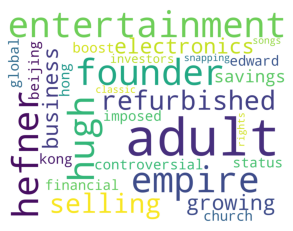

In [4]:
df_source = get_sources()
df_selected = get_everything('apple stock', 'bbc-news')[['title', 'url', 'urlToImage', 'sentiment']][0:5] # returns the five articles and its sentiment
df_topword = news_top_mentioned(get_everything('apple stock', 'bbc-news'), 'apple stock') # returns the top 10 words based on the count
news_wordcloud(get_everything('apple stock', 'bbc-news'), 'apple stock')  # calling wordcloud function

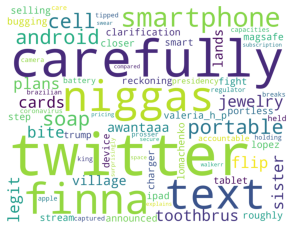

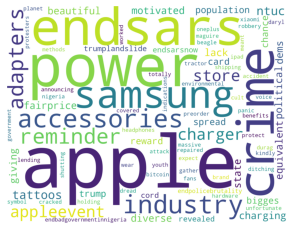

In [5]:
tweets_recent = tweet_search('iphone', 'recent')[['Tweets', 'Sentiment']][0:5]
tweets_pop =  tweet_search('iphone', 'popular')[['Tweets', 'Sentiment']][0:5]

topword_recent = twt_top_mentioned(tweet_search('iphone', 'recent'), 'iphone')
topword_pop = twt_top_mentioned(tweet_search('iphone', 'popular'), 'iphone')

overall_sent_recent= overallsentiment(tweet_search('iphone', 'recent'))
overall_sent_pop = overallsentiment(tweet_search('iphone', 'popular'))

twt_wordcloud(tweet_search('iphone', 'recent'),'iphone')
twt_wordcloud(tweet_search('iphone', 'popular'),'iphone')
